<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        💳 Payment Card Fraud Detection 2025 🛡️
    </h1>
</div>


# Overview

**Background**

This dataset contains **transaction records from a luxury cosmetics retailer** across multiple global locations.
It includes details about **customers, purchases, payment methods, devices, and store activity**.

The dataset is designed for analyzing **fraudulent payment card transactions** (⚠️💳), focusing on behavioral and transactional patterns that distinguish **legitimate vs. fraudulent purchases**.

Fraud detection is critical in luxury retail due to:

* **High-value transactions** 
* **Diverse payment methods**
* **Cross-border operations**
* Potential exploitation of **e-commerce and in-store channels**

**Goal of the Project**

Build a machine learning model to:

* **Predict fraudulent transactions** based on transaction and customer attributes
* Identify **key indicators of fraud** (e.g., unusual purchase amount, atypical device usage, loyalty mismatch)
* Provide insights to **retailers and payment providers** to strengthen fraud prevention systems.

**Key Features**

| Feature Name            | Description                                                               |
| ----------------------- | ------------------------------------------------------------------------- |
| `Transaction_ID`        | Unique identifier for each transaction                                    |
| `Customer_ID`           | Unique identifier for each customer                                       |
| `Transaction_Date`      | Date of transaction                                                       |
| `Transaction_Time`      | Time of transaction                                                       |
| `Customer_Age`          | Age of the customer                                                       |
| `Customer_Loyalty_Tier` | Loyalty status (e.g., Bronze, Silver, Platinum)                           |
| `Location`              | City/region of the transaction                                            |
| `Store_ID`              | Store where the purchase occurred                                         |
| `Product_SKU`           | Product identifier                                                        |
| `Product_Category`      | Type of product (e.g., Serum, Lipstick, Mascara)                          |
| `Purchase_Amount`       | Value of the purchase (numeric)                                           |
| `Payment_Method`        | Method used (Credit Card, Mobile Payment, Gift Card, etc.)                |
| `Device_Type`           | Device used for purchase (Desktop, Mobile, Tablet)                        |
| `IP_Address`            | IP address of transaction (useful for anomaly detection)                  |
| `Fraud_Flag`            | Target variable: `1` = Fraudulent, `0` = Legitimate                       |
| `Footfall_Count`        | Number of customers present at the store at transaction time (contextual) |

**Files Provided**

* `luxury_cosmetics_fraud_analysis_2025.csv`: Main dataset containing transaction and fraud labels

**Project Objective**

The goal of this notebook is to **model and predict fraud in luxury cosmetics transactions**.

**Key Steps**

* **Exploratory Data Analysis (EDA):** <br>
  Explore transaction distributions (amounts, categories, locations, devices).

* **Modeling:**
  Train and compare multiple models:

  * Logistic Regression / Random Forest / XGBoost (for fraud classification)
  * Ensemble methods for better generalization

* **Evaluation Framework:**

  * **Cross-validation** to ensure robust performance
  * **Fraud-specific metrics**:

    * **AUC-ROC**: Balance between detecting fraud and minimizing false alarms.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import (roc_curve, roc_auc_score, classification_report, confusion_matrix,
                             precision_recall_curve, auc)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [2]:
# Load the datasets
df_fraud = pd.read_csv("luxury_cosmetics_fraud_analysis_2025.csv")

# Verify shapes
print("Data Shape:", df_fraud.shape)

Data Shape: (2133, 16)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [3]:
# Display few rows of dataset
print("Data Preview:")
display(df_fraud.head())

Data Preview:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Time,Customer_Age,Customer_Loyalty_Tier,Location,Store_ID,Product_SKU,Product_Category,Purchase_Amount,Payment_Method,Device_Type,IP_Address,Fraud_Flag,Footfall_Count
0,702bdd9b-9c93-41e3-9dbb-a849b2422080,119dca0b-8554-4b2d-9bec-e964eaf6af97,2025-07-27,04:04:15,56.0,Silver,San Francisco,FLAGSHIP-LA,NEBULA-SERUM-07,Concealer,158.24,Mobile Payment,Desktop,239.249.58.237,0,333
1,2e64c346-36bc-4acf-bc2b-8b0fdf46abc5,299df086-26c4-4708-b6d7-fcaeceb14637,2025-03-14,20:23:23,46.0,Platinum,Zurich,BOUTIQUE-SHANGHAI,STELLAR-FOUND-03,Lipstick,86.03,Credit Card,Tablet,84.49.227.90,0,406
2,29ad1278-70ce-421f-8d81-23816b39f4ac,dfa3d24d-b935-49a5-aa1d-7d57a44d8773,2025-02-20,12:36:02,32.0,Silver,Milan,POPUP-TOKYO,SOLAR-BLUSH-04,Mascara,255.69,Gift Card,Desktop,79.207.35.55,0,96
3,07dc4894-e0eb-48f1-99a7-1942b1973d9b,7a67e184-9369-49ee-aeac-18f5b51b230f,2025-04-25,19:09:43,60.0,Bronze,London,BOUTIQUE-NYC,GALAXIA-SET-08,Serum,282.76,Gift Card,Mobile,176.194.167.253,0,186
4,ae407054-5543-429c-918a-cdcc42ea9782,cf14730a-8f5a-453d-b527-39a278852b27,2025-04-17,14:23:23,NaN,Platinum,Miami,BOUTIQUE-NYC,LUNAR-MASC-02,Serum,205.86,Gift Card,Mobile,166.31.46.111,0,179


In [4]:
df_fraud.columns = (
    df_fraud.columns
    .str.strip()
)

# Display information about the DataFrames
print("Data Info:")
df_fraud.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         2133 non-null   object 
 1   Customer_ID            2133 non-null   object 
 2   Transaction_Date       2133 non-null   object 
 3   Transaction_Time       2133 non-null   object 
 4   Customer_Age           2027 non-null   float64
 5   Customer_Loyalty_Tier  2027 non-null   object 
 6   Location               2133 non-null   object 
 7   Store_ID               2133 non-null   object 
 8   Product_SKU            2133 non-null   object 
 9   Product_Category       2133 non-null   object 
 10  Purchase_Amount        2133 non-null   float64
 11  Payment_Method         2027 non-null   object 
 12  Device_Type            2133 non-null   object 
 13  IP_Address             2133 non-null   object 
 14  Fraud_Flag             2133 non-null   int64 

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **2133** samples with **16** columns, including the target variable `Fraud_Flag`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `Customer_Age`, `Purchase_Amount`, `Footfall_Count`.
     - **Categorical features:** `Transaction_ID`, `Customer_ID`, `Transaction_Date`, `Transaction_Time`, `Customer_Loyalty_Tier`, `Location`, `Store_ID`, `Product_SKU`, `Product_Category`, `Payment_Method`, `Device_Type`, `IP_Address`, `Fraud_Flag`
   - The target variable is **categorical** variable.

**Data Completeness**  
   - The dataset have **missing values** and we need to handle in section pre-processing data.
   - Data types are appropriate: numerical features are int64 and float64 and categorical features is object.

In [5]:
num_features = ["Customer_Age", "Purchase_Amount", "Footfall_Count"]
cat_features = ["Transaction_ID", "Customer_ID", "Transaction_Date", "Transaction_Time", "Customer_Loyalty_Tier", "Location",
                "Store_ID", "Product_SKU", "Product_Category", "Payment_Method", "Device_Type", "IP_Address", "Fraud_Flag"]
print("Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_fraud.drop(columns=cat_features, axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
Customer_Age,2027.000000,41.684262,13.718110,18.000000,30.000000,42.000000,53.000000,65.000000
Purchase_Amount,2133.000000,174.614074,72.249043,50.260000,113.850000,174.180000,236.360000,299.910000
Footfall_Count,2133.000000,272.461791,131.113027,50.000000,157.000000,269.000000,388.000000,500.000000


## Descriptive Insights – Numerical Features

1. **Customer\_Age**

* **Mean \~ 41.7 years**, with std \~ 13.7 → indicates moderate variation.
* 50% of customers fall within **30 → 53 years** (Q1–Q3).
* **Min = 18, Max = 65** → mostly adults, very few very young or elderly customers.

→ Middle-aged customers (30–50) are the **core luxury cosmetics buyers**.

2. **Purchase\_Amount**

* **Mean \~ 174.6 USD**, with std \~ 72.2 → considerable variability.
* 50% of transactions range from **113.9 → 236.4 USD** (Q1–Q3).
* **Min = 50.3 USD, Max \~ 299.9 USD** → most transactions fall between **50–300 USD**.

3. **Footfall\_Count**

* **Mean \~ 272 customers**, with std \~ 131 → large variation across stores and time.
* 50% of values fall between **157 → 388 customers** (Q1–Q3).
* **Min = 50, Max = 500** → shows significant differences in customer flow between flagship vs. smaller stores.

In [ ]:
cat_features = ["Transaction_ID", "Customer_ID", "Transaction_Date", "Transaction_Time", "Customer_Loyalty_Tier", "Location",
                "Store_ID", "Product_SKU", "Product_Category", "Payment_Method", "Device_Type", "IP_Address", "Fraud_Flag"]

df_fraud["Transaction_Timestamp"] = pd.to_datetime(
    df_fraud["Transaction_Date"] + " " + df_fraud["Transaction_Time"],
    format="%Y-%m-%d %H:%M:%S"
)

df_fraud.drop(columns=["Transaction_Date", "Transaction_Time"], axis=1, inplace=True)

def convert_cat(features, df = df_fraud):
    for feature in features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
convert_cat(cat_features)

df["Customer_Age"] = df["Customer_Age"].astype("int8")

# Display information about the DataFrames
print("Data Info:")
df_fraud.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         2133 non-null   category      
 1   Customer_ID            2133 non-null   category      
 2   Customer_Age           2027 non-null   float64       
 3   Customer_Loyalty_Tier  2027 non-null   category      
 4   Location               2133 non-null   category      
 5   Store_ID               2133 non-null   category      
 6   Product_SKU            2133 non-null   category      
 7   Product_Category       2133 non-null   category      
 8   Purchase_Amount        2133 non-null   float64       
 9   Payment_Method         2027 non-null   category      
 10  Device_Type            2133 non-null   category      
 11  IP_Address             2133 non-null   category      
 12  Fraud_Flag             2133 non-null   category    

In [ ]:
list_features_drop = ["Customer_Age", "Purchase_Amount", "Footfall_Count", "Transaction_ID", "Customer_ID", 
                      "Transaction_Timestamp", "Fraud_Flag", "IP_Address"]

print("Data describe:")
cat_summary = df_fraud.drop(columns=list_features_drop, axis=1).describe().T
cat_summary.style.background_gradient(cmap="Blues", subset=["unique", "freq"])

Data describe:


,count,unique,top,freq
Customer_Loyalty_Tier,2027,5,Bronze,808
Location,2133,20,Sydney,128
Store_ID,2133,10,FLAGSHIP-PARIS,234
Product_SKU,2133,10,ECLIPSE-EYE-10,235
Product_Category,2133,10,Serum,233
Payment_Method,2027,4,Debit Card,522
Device_Type,2133,4,Tablet,553


## Categorical Feature Insights

* **Customer\_Loyalty\_Tier**:

  * Contains **5 tiers of membership**.
  * **Bronze (808 customers)** is the most common group.
  * The imbalance shows that **transactions are concentrated among lower-tier customers**.

* **Location**:

  * Includes **20 cities/regions**.
  * **Sydney (128 transactions)** is the most frequent location.
  * The distribution reflects **multi-national/multi-regional coverage**.

* **Store\_ID**:

  * **10 stores**, with **FLAGSHIP-PARIS (234 transactions)** leading.

* **Product\_SKU**:

  * Contains **10 unique SKUs**.
  * The most frequent SKU: **ECLIPSE-EYE-10 (235 purchases)**.

* **Product\_Category**:

  * **10 product categories**, with **Serum (233 transactions)** being the most common.
  * Indicates that luxury skincare products dominate.

* **Payment\_Method**:

  * **4 payment methods**.
  * **Debit Card (522 transactions)** is the most common.

* **Device\_Type**:

  * **4 device types**.
  * **Tablet (553 transactions)** is surprisingly the most used.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [8]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value dataset: ")
displayNULL(df_fraud, dataset_name="Dataset")

Missing value dataset: 
🔎 Missing Value Summary for: Dataset
+-----------------------+---------------+-----------+
| Feature               | Missing_Count | Missing_% |
+-----------------------+---------------+-----------+
| Customer_Age          | 106           | 4.97      |
| Customer_Loyalty_Tier | 106           | 4.97      |
| Payment_Method        | 106           | 4.97      |
+-----------------------+---------------+-----------+

⚠️  Total missing values: 318 out of 2,133 rows.


## Checking duplicate Value

In [9]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Data": df_fraud
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Data Duplicate Analysis
✅ No duplicates found in 2,133 rows



## Checking Outlier Value

In [10]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        
        if len(outliers) > 0:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers),
                # "Outlier Detail": outliers.tolist()
            })

    if len(outlier_info) == 0:
        print("✅ No outliers detected in the selected features.")
    else:
        return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_fraud, dataset_name="Data")

🔍 Data Checking outlier
✅ No outliers detected in the selected features.


## Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values in the dataset.

* **The missing values** were detected in dataset such as `Customer_Age` (106 - ~5%), `Customer_Loyalty_Tier` (106 - ~5%) and `Payment_Method` (106 - ~5%).

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

  * **No duplicates** detected in 2512 rows — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **No outliers** were found in dataset at features.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [11]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [12]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}", fontsize=14, weight="bold", pad=20)
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Fraud_Flag Distribution

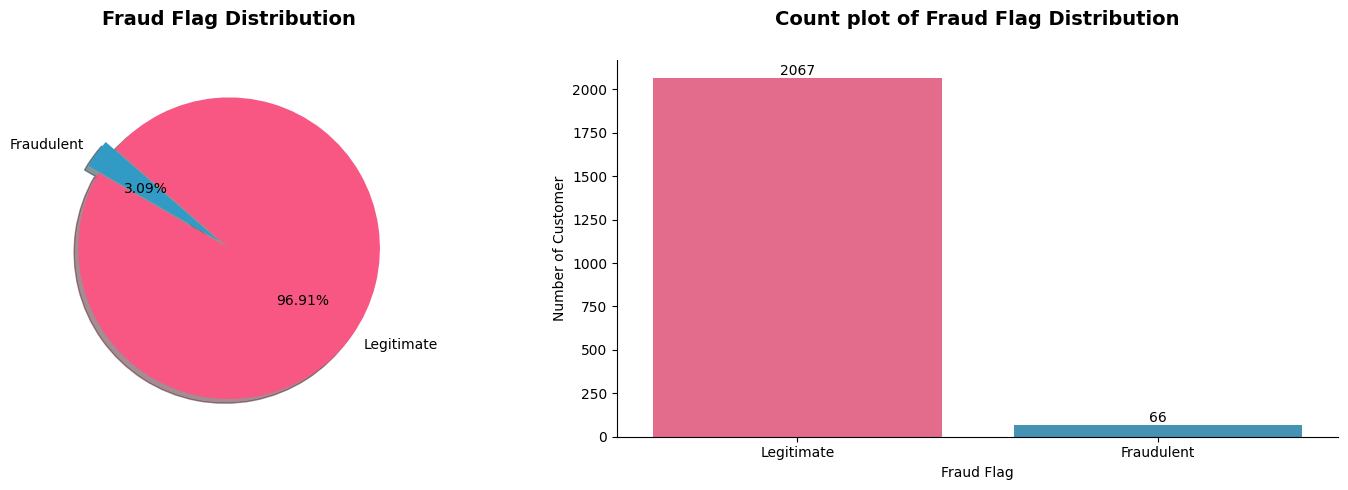

In [13]:
fraud_flag_Distribution  = df_fraud["Fraud_Flag"].value_counts()
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
n_color = color(n_colors=df_fraud["Fraud_Flag"].nunique())
# ax[0]
ax[0].pie(
    fraud_flag_Distribution,
    labels = ["Legitimate", "Fraudulent"],
    colors = n_color,
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Fraud Flag Distribution",  weight="bold", fontsize=14, pad=25)

# ax[1]
sns.countplot(data=df_fraud, x = "Fraud_Flag", palette=n_color, 
              ax=ax[1])
ax[1].set_title("Count plot of Fraud Flag Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10)
ax[1].set_ylabel("Number of Customer")
ax[1].set_xticks([0, 1], ["Legitimate", "Fraudulent"])
ax[1].set_xlabel("Fraud Flag")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

### Insights into Fraud Flag Distribution

**Frequency of fraud categories**

* The pie chart and count plot illustrate the distribution of transaction labels.
* `Legitimate` transactions dominate with **2067 records**, accounting for approximately **96.91%** of the dataset.
* `Fraudulent` transactions are rare, with only **66 records**, making up just **3.09%** of the dataset.

***The dataset is highly imbalanced, with legitimate transactions vastly outnumbering fraudulent ones. This imbalance poses a major challenge for fraud detection modeling, as models may become biased toward predicting the majority (legitimate) class. Techniques such as resampling (SMOTE, undersampling), anomaly detection, or cost-sensitive learning will be necessary to improve detection of the minority fraudulent cases.***

## Numerical Feature Distributions

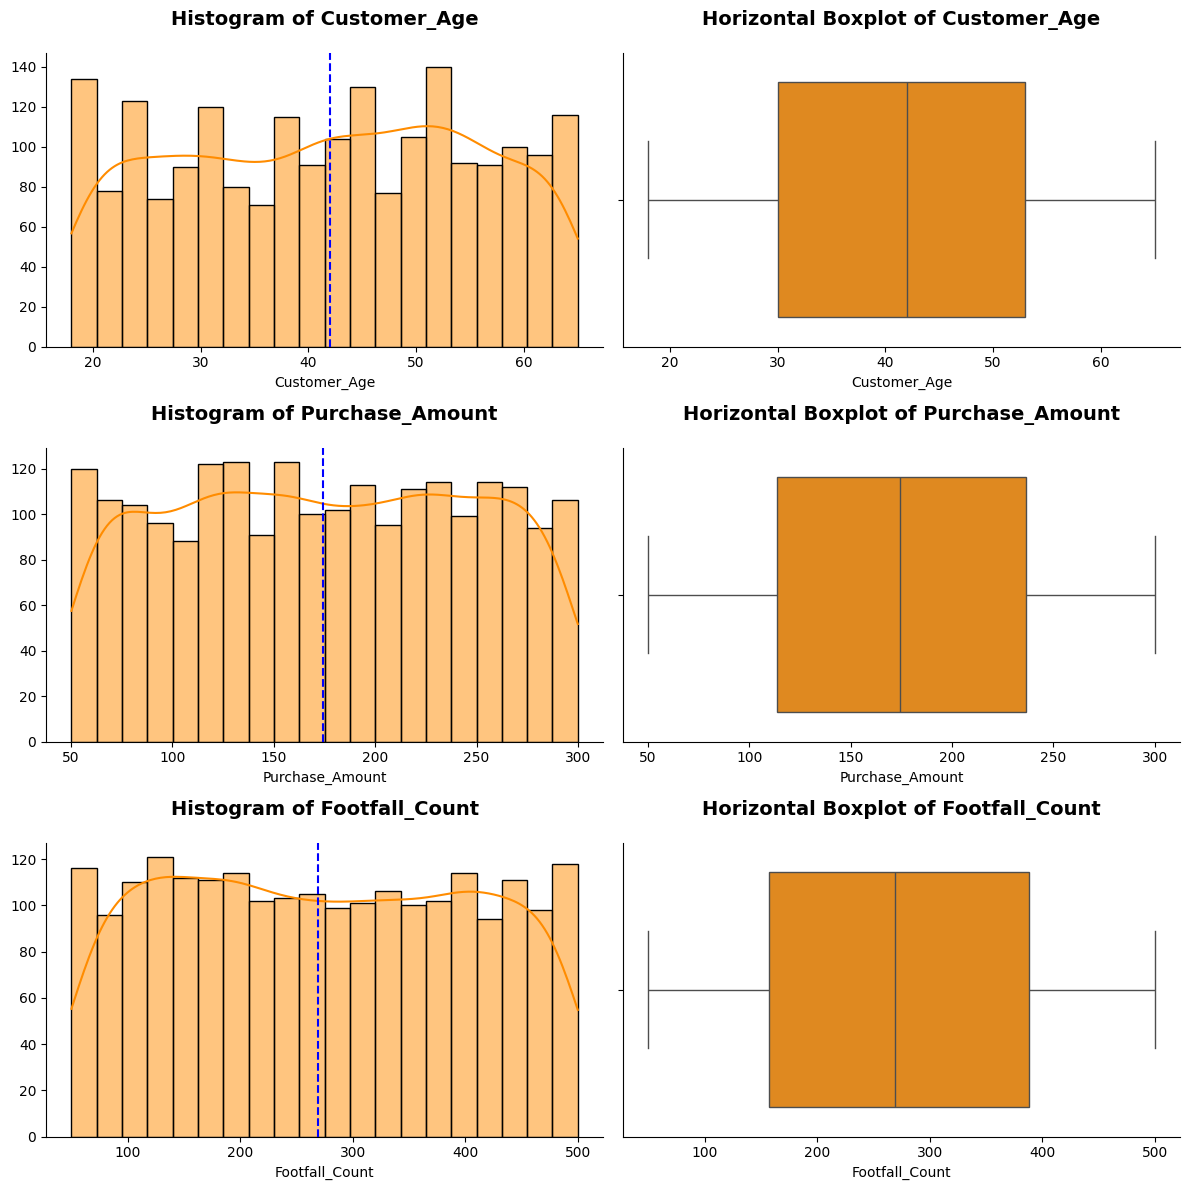

In [14]:
def plot_numerical_features(df=df_fraud, numerical_features = num_features):
    fig, ax = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="darkorange", bins = 20, kde=True, ax=ax[i, 0])
        ax[i, 0].set_title(f"Histogram of {feature}", weight="bold", fontsize=14, pad=20)
        ax[i, 0].set_ylabel("")
        ax[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")
        sns.despine(ax=ax[i, 0], top=True, right=True, left=False, bottom=False)

        sns.boxplot(data=df[feature], color="darkorange", orient="h", ax=ax[i, 1])
        ax[i, 1].set_title(f"Horizontal Boxplot of {feature}", weight="bold", fontsize=14, pad=20)
        ax[i, 1].set_xlabel(feature)
        sns.despine(ax=ax[i, 1], top=True, right=True, left=False, bottom=False)


    plt.tight_layout()
    plt.show()
plot_numerical_features()

In [15]:
def check_skewness(data = df_fraud, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*75)
    print(f"{'Feature':<35} | {'Skewness':<10} | {'Remark'}")
    print("-"*75)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<35} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<35} | {skew:>+10f} | {remark}")
    print("-"*75)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
---------------------------------------------------------------------------
Feature                             | Skewness   | Remark
---------------------------------------------------------------------------
Customer_Age                        |  -0.055131 | Approximately symmetric
Footfall_Count                      |  +0.037481 | Approximately symmetric
Purchase_Amount                     |  -0.009066 | Approximately symmetric
---------------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Boxplots** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

* All numerical variables in the dataset have **very low skewness**.
* This indicates that the **data distribution is approximately symmetric**, with no variable showing strong left or right skewness.

### Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y

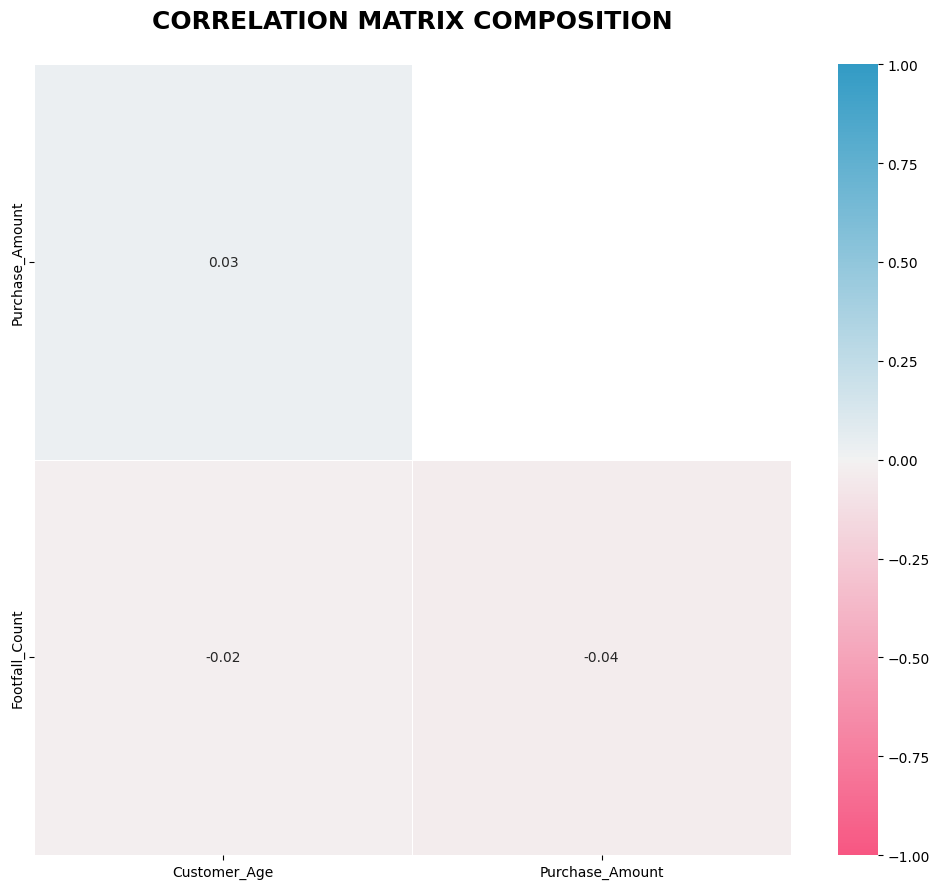

In [16]:
corr_matrix = df_fraud.drop(columns="Fraud_Flag", axis=1).corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="center", fontsize=18, weight="bold");
plt.tight_layout()
plt.show()

#### Insights from Correlation Analysis of Numerical Features

* **Customer\_Age vs Purchase\_Amount (0.03)** → Almost **no correlation**. Customer age does not significantly affect spending amount.
* **Customer\_Age vs Footfall\_Count (-0.02)** → **Very weak correlation, close to 0**. Customer age is not related to store foot traffic.
* **Purchase\_Amount vs Footfall\_Count (-0.04)** → **No clear correlation**. Transaction value is not dependent on how crowded the store is.

**Summary**: The numerical features in this dataset are **nearly independent** of each other. This reduces the risk of **multicollinearity**, but it also means there are **no strong linear relationships** to leverage directly.

## Bivariate Analysis

,Fraud_Flag,Count,Mean,Median,Std
1,1,63,42.269841,43.000000,13.835679
0,0,1964,41.665479,42.000000,13.717461


🔎 D’Agostino and Pearson Normality Test for 'Customer_Age' across 'Fraud_Flag' groups

 Group: 0 (n = 1964)
  Statistic : 1258.638
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 63)
  Statistic : 12.354
  p-value   : 0.00208
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Customer_Age' by 'Fraud_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 60369.5
p-value     : 0.7434958313345967

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


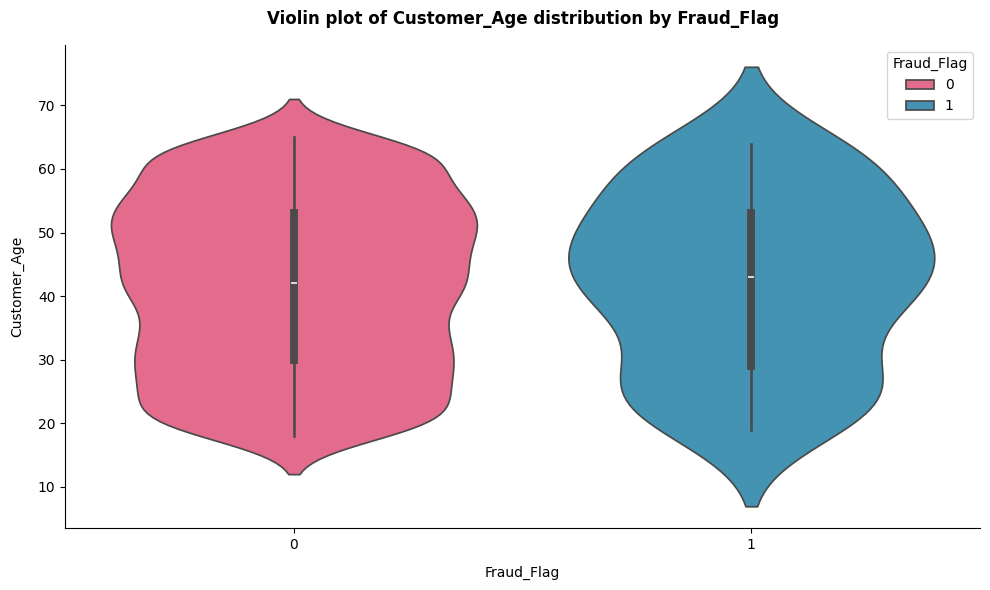

,Fraud_Flag,Count,Mean,Median,Std
0,0,2067,174.865104,174.170000,72.256163
1,1,66,166.752273,178.585000,72.130203


🔎 D’Agostino and Pearson Normality Test for 'Purchase_Amount' across 'Fraud_Flag' groups

 Group: 0 (n = 2067)
  Statistic : 1653.271
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 66)
  Statistic : 22.686
  p-value   : 0.00001
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Purchase_Amount' by 'Fraud_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 72723.0
p-value     : 0.359692661780882

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


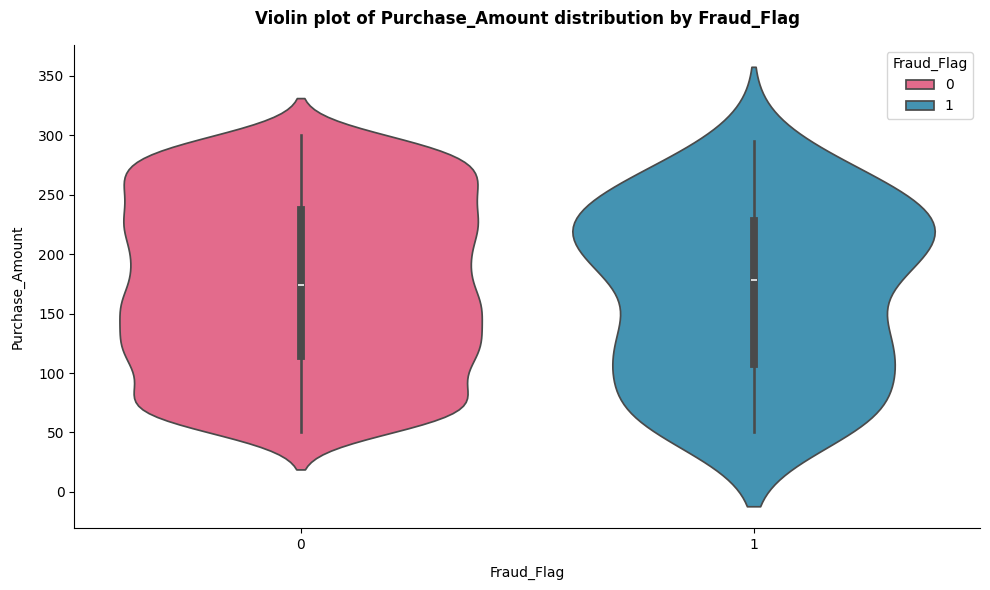

,Fraud_Flag,Count,Mean,Median,Std
1,1,66,287.984848,301.000000,127.054621
0,0,2067,271.966134,268.000000,131.240112


🔎 D’Agostino and Pearson Normality Test for 'Footfall_Count' across 'Fraud_Flag' groups

 Group: 0 (n = 2067)
  Statistic : 1942.168
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 66)
  Statistic : 22.430
  p-value   : 0.00001
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Footfall_Count' by 'Fraud_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 63386.5
p-value     : 0.3273821792190309

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


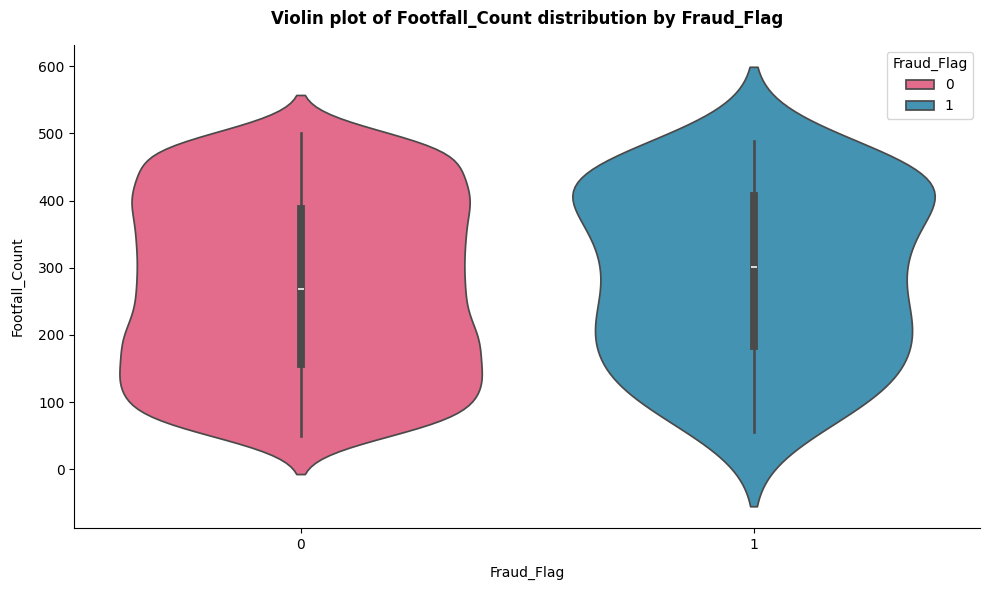

In [17]:
from IPython.core.display import HTML
target_feature = "Fraud_Flag"

def perform_statical_testing(feature, df=df_fraud, total_categories=2, target_feature=target_feature):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df)
    total_categories = df[target_feature].nunique()
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df, categorical_feature=target_feature, num_feature=feature)
    else:
        perform_kruskal_test(df=df, categorical_feature=target_feature, numeric_feature=feature)

def plot_numerical_distribution_by_target_feature(feature, df = df_fraud, target_feature = target_feature):
    """
    Performs statical testing for each groups (distribution by target_feature) by Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by {target_feature}</b></h2>"))
    # Summary information
    df_summary_feature = df.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df[feature].mean():.2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df, hue=target_feature,
                   palette=color(n_colors=len(df[target_feature].unique())), ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    plot_numerical_distribution_by_target_feature(feature=feature)

### Insight Numerical Features by Fraud_Flag

`Customer_Age`

* Customer\_Age does **not provide strong discriminatory power** for fraud detection.
* Fraudulent transactions occur across similar age ranges as legitimate ones.

`Purchase_Amount`

* Fraudulent transactions have a **similar average purchase amount** compared to legitimate ones.
* `Purchase_Amount` alone is **not a strong discriminative feature** for fraud detection.
* However, the slightly higher median in fraud cases.

`Fraud_Flag`

* `Footfall_Count` does not exhibit clear differences between fraud and non-fraud cases.

In [18]:
# Create a dictionary mapping City -> Country
city_to_country = {
    "Sydney": "Australia",
    "Zurich": "Switzerland",
    "Geneva": "Switzerland",
    "Shanghai": "China",
    "Hong Kong": "China",
    "Cannes": "France",
    "Paris": "France",
    "Singapore": "Singapore",
    "Monte Carlo": "Monaco",
    "Monaco": "Monaco",
    "San Francisco": "USA",
    "Los Angeles": "USA",
    "Miami": "USA",
    "Las Vegas": "USA",
    "New York": "USA",
    "London": "UK",
    "Rome": "Italy",
    "Milan": "Italy",
    "Dubai": "UAE",
    "Tokyo": "Japan"
}

# Map into the dataframe
df_fraud["Country"] = df_fraud["Location"].map(city_to_country)

df_fraud.drop(columns="Location", axis=1, inplace=True)
df_fraud.drop(columns="IP_Address", axis=1, inplace=True)
df_fraud["Country"] = df_fraud["Country"].astype("category")
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         2133 non-null   category      
 1   Customer_ID            2133 non-null   category      
 2   Customer_Age           2027 non-null   float64       
 3   Customer_Loyalty_Tier  2027 non-null   category      
 4   Store_ID               2133 non-null   category      
 5   Product_SKU            2133 non-null   category      
 6   Product_Category       2133 non-null   category      
 7   Purchase_Amount        2133 non-null   float64       
 8   Payment_Method         2027 non-null   category      
 9   Device_Type            2133 non-null   category      
 10  Fraud_Flag             2133 non-null   category      
 11  Footfall_Count         2133 non-null   int64         
 12  Transaction_Timestamp  2133 non-null   datetime64[ns]
 13  Cou

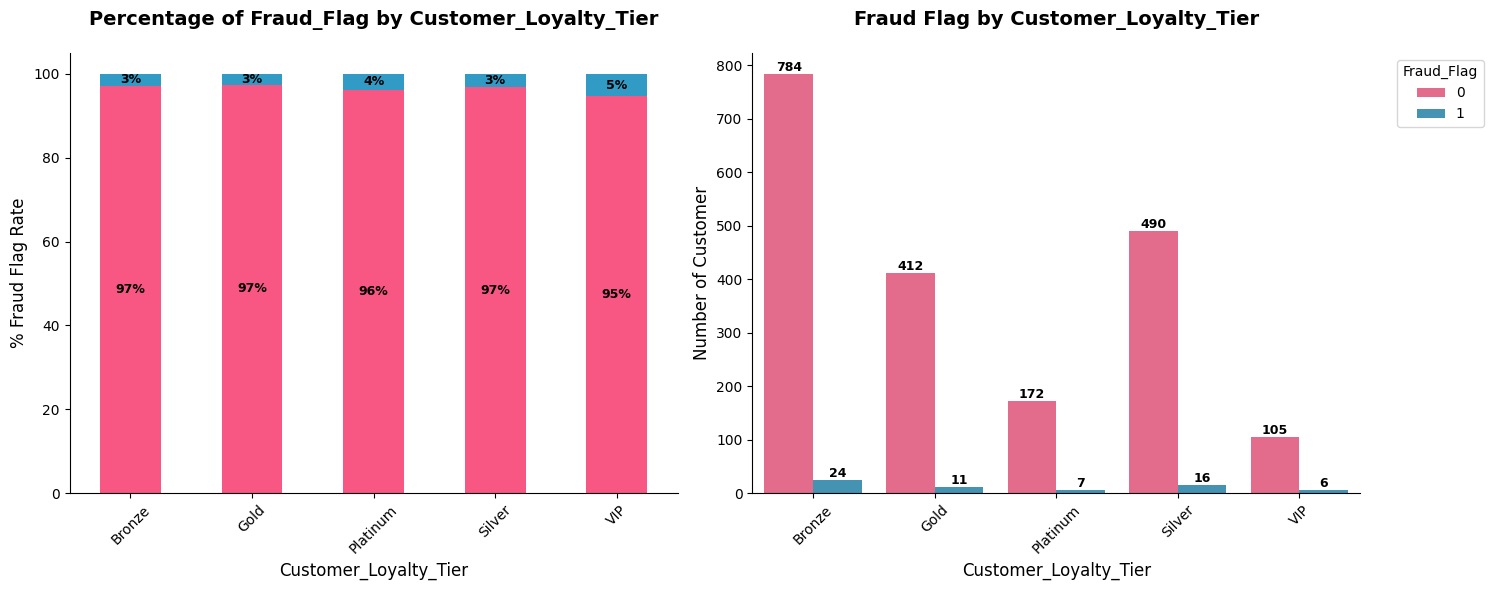


🔍 Chi-Square Test of Independence: 'Customer_Loyalty_Tier' vs. 'Fraud_Flag'
Chi-squared statistic: 2.688
Degrees of freedom: 4
p-value: 0.611267
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Customer_Loyalty_Tier' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag                0     1
Customer_Loyalty_Tier            
Bronze                 0.05 -0.30
Gold                   0.12 -0.64
Platinum              -0.10  0.57
Silver                -0.00  0.01
VIP                   -0.24  1.33


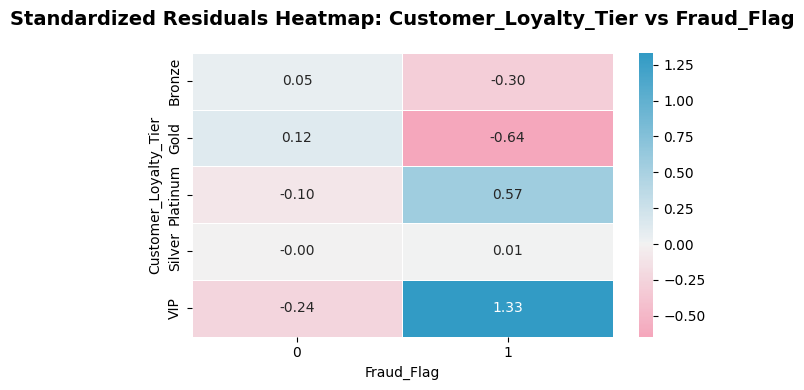

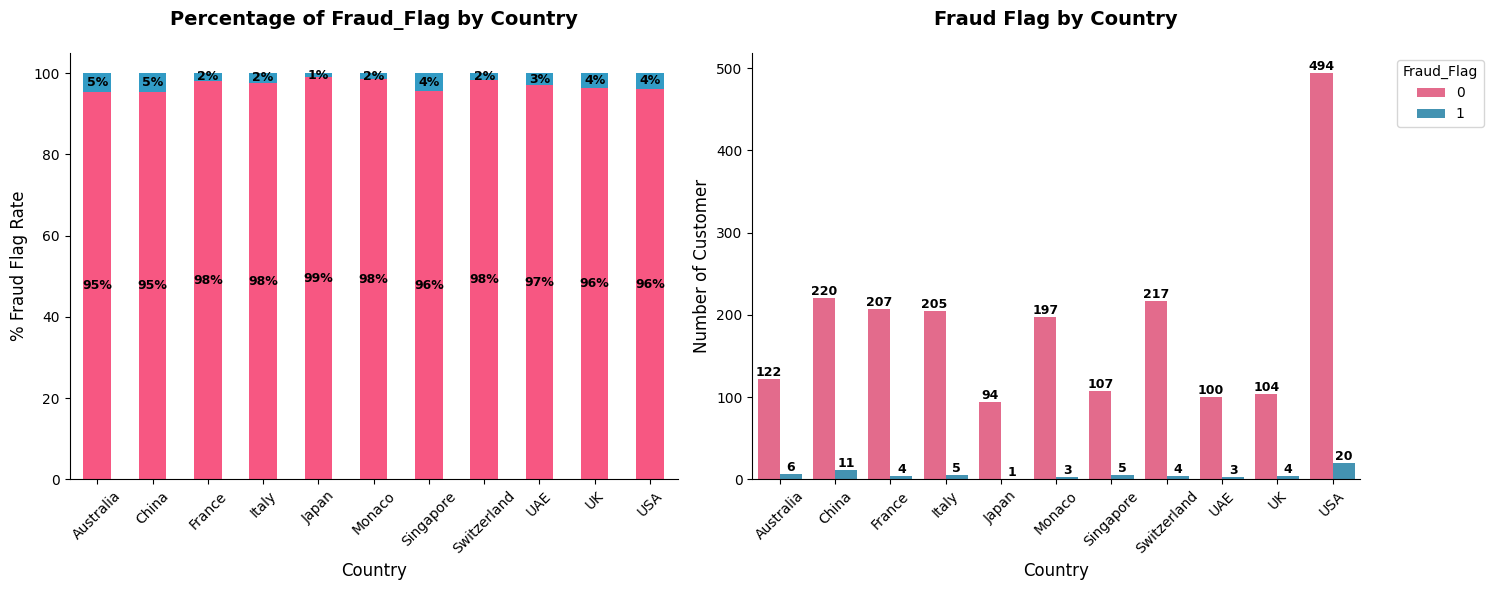


🔍 Chi-Square Test of Independence: 'Country' vs. 'Fraud_Flag'
Chi-squared statistic: 10.759
Degrees of freedom: 10
p-value: 0.376572
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Country' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag      0     1
Country                
Australia   -0.18  1.02
China       -0.26  1.44
France       0.18 -0.99
Italy        0.11 -0.59
Japan        0.20 -1.13
Monaco       0.23 -1.28
Singapore   -0.15  0.82
Switzerland  0.19 -1.09
UAE          0.02 -0.10
UK          -0.06  0.36
USA         -0.18  1.03


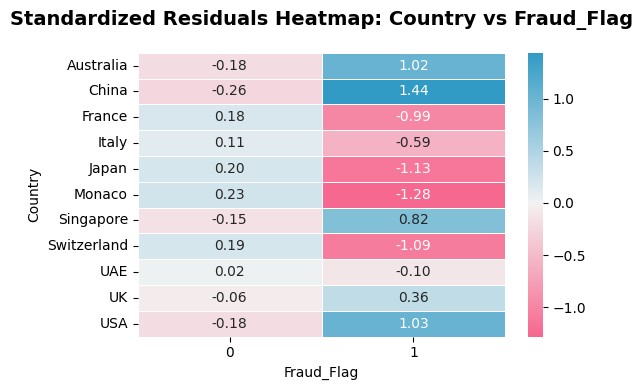

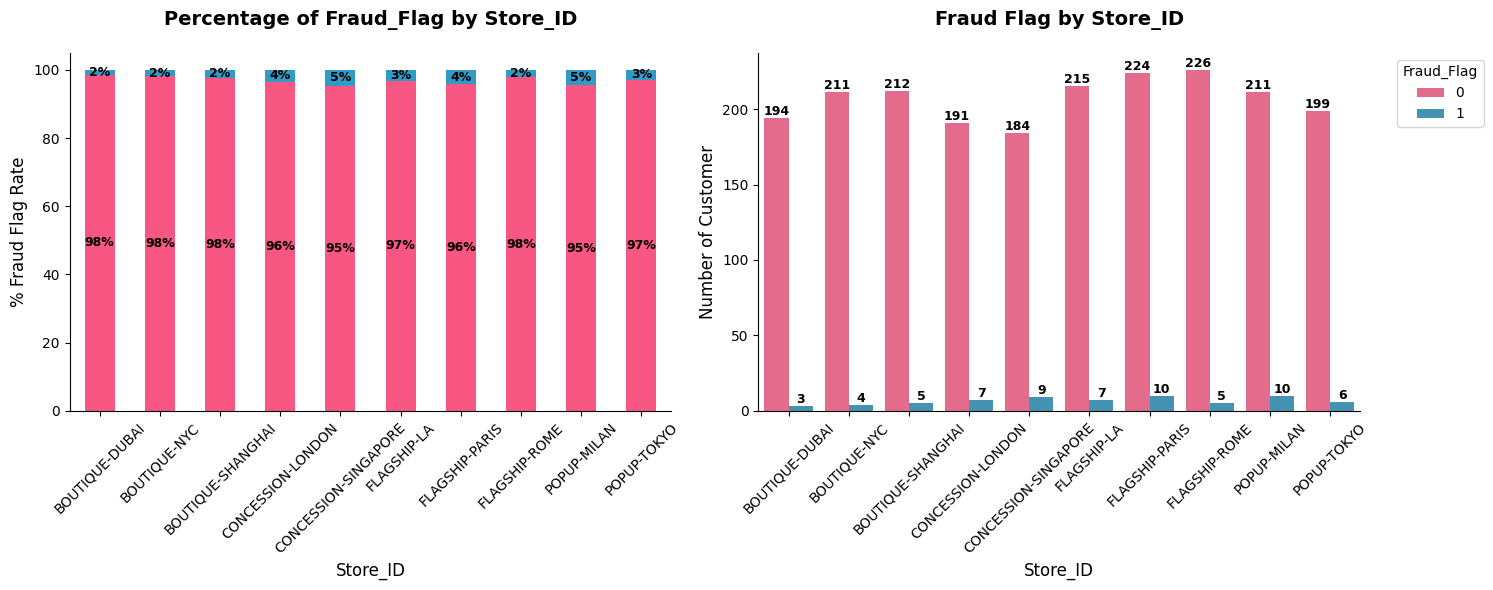


🔍 Chi-Square Test of Independence: 'Store_ID' vs. 'Fraud_Flag'
Chi-squared statistic: 8.160
Degrees of freedom: 9
p-value: 0.518110
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Store_ID' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag               0     1
Store_ID                        
BOUTIQUE-DUBAI        0.22 -1.25
BOUTIQUE-NYC          0.18 -1.03
BOUTIQUE-SHANGHAI     0.12 -0.66
CONCESSION-LONDON    -0.06  0.35
CONCESSION-SINGAPORE -0.22  1.24
FLAGSHIP-LA          -0.01  0.05
FLAGSHIP-PARIS       -0.18  1.03
FLAGSHIP-ROME         0.14 -0.80
POPUP-MILAN          -0.22  1.21
POPUP-TOKYO           0.02 -0.14


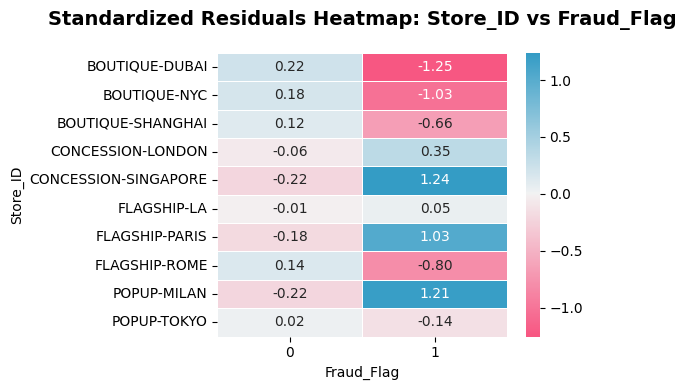

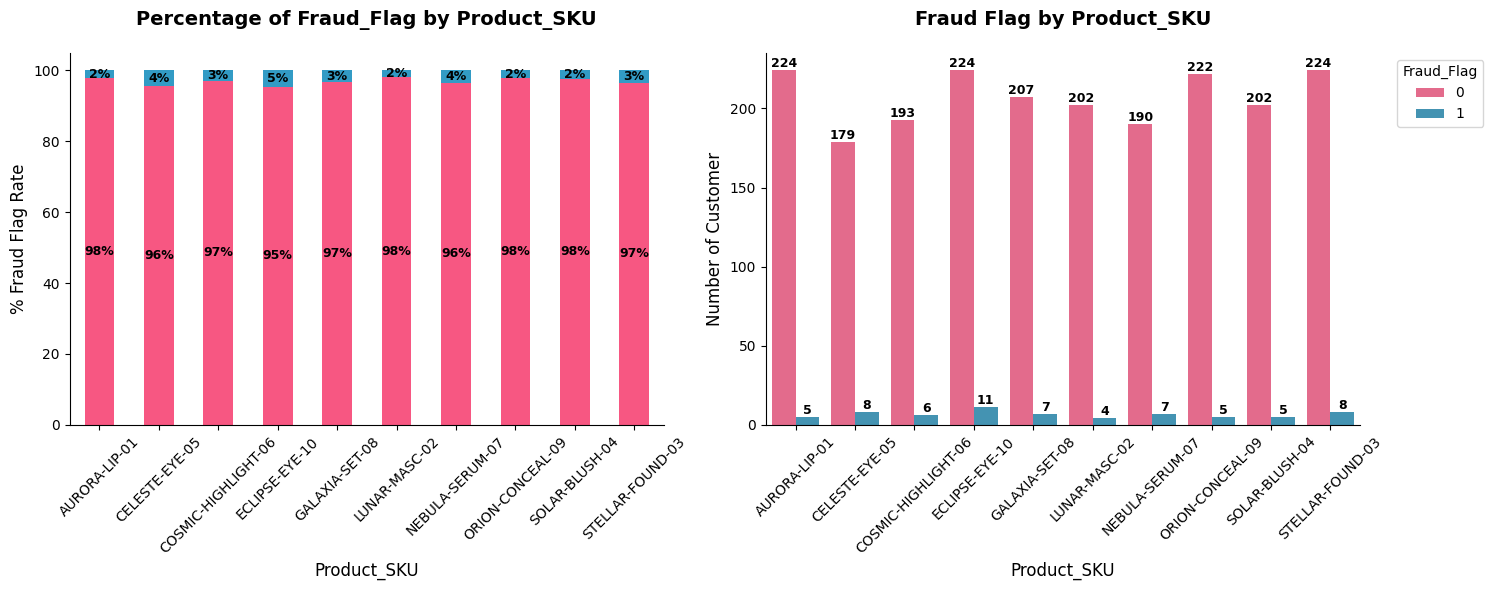


🔍 Chi-Square Test of Independence: 'Product_SKU' vs. 'Fraud_Flag'
Chi-squared statistic: 5.575
Degrees of freedom: 9
p-value: 0.781602
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Product_SKU' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag              0     1
Product_SKU                    
AURORA-LIP-01        0.14 -0.78
CELESTE-EYE-05      -0.16  0.92
COSMIC-HIGHLIGHT-06  0.01 -0.06
ECLIPSE-EYE-10      -0.25  1.38
GALAXIA-SET-08      -0.03  0.15
LUNAR-MASC-02        0.17 -0.94
NEBULA-SERUM-07     -0.07  0.37
ORION-CONCEAL-09     0.14 -0.76
SOLAR-BLUSH-04       0.10 -0.56
STELLAR-FOUND-03    -0.05  0.31


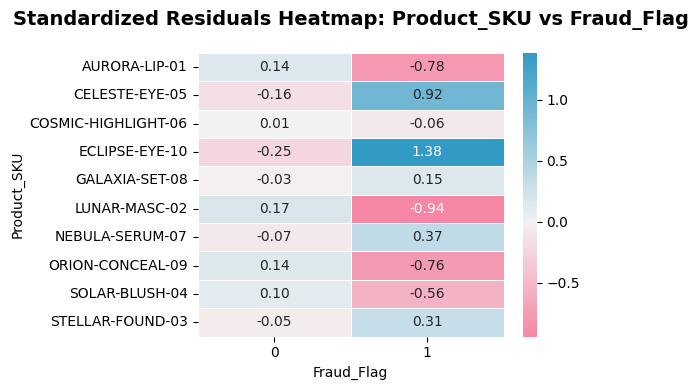

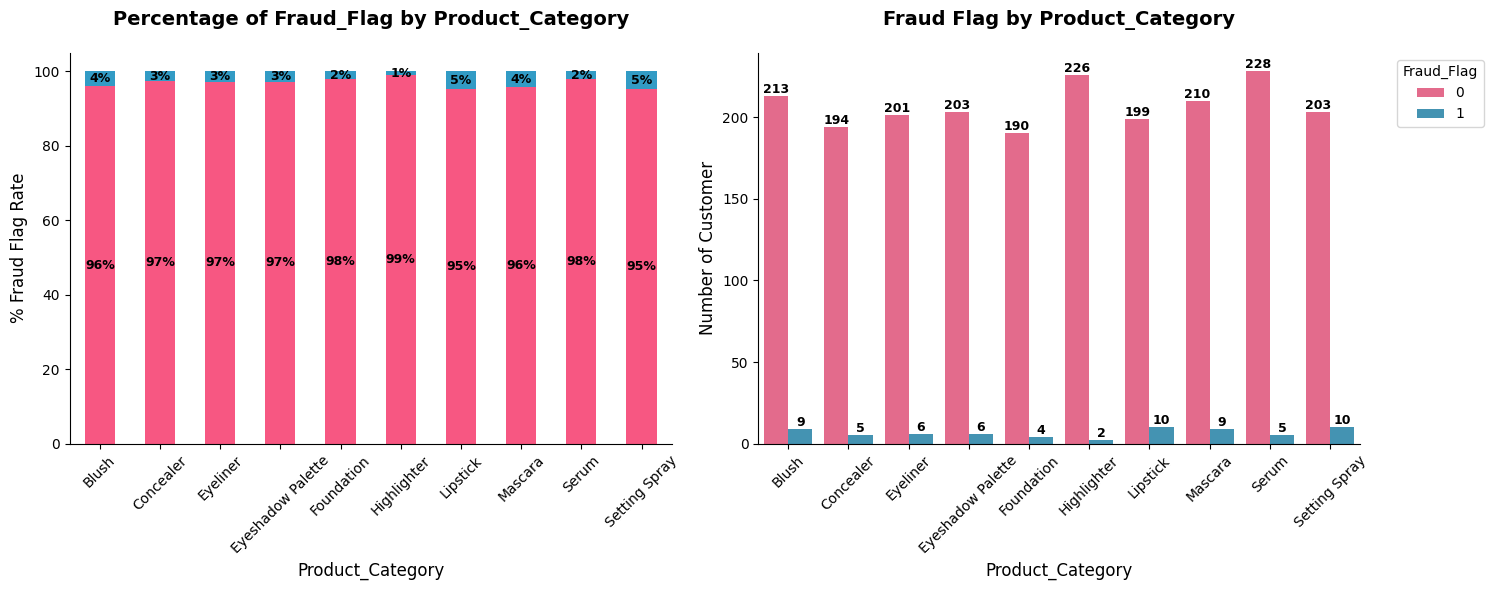


🔍 Chi-Square Test of Independence: 'Product_Category' vs. 'Fraud_Flag'
Chi-squared statistic: 10.658
Degrees of freedom: 9
p-value: 0.299854
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Product_Category' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag            0     1
Product_Category             
Blush             -0.15  0.81
Concealer          0.08 -0.47
Eyeliner           0.03 -0.16
Eyeshadow Palette  0.03 -0.18
Foundation         0.15 -0.82
Highlighter        0.34 -1.90
Lipstick          -0.25  1.39
Mascara           -0.15  0.85
Serum              0.15 -0.82
Setting Spray     -0.24  1.33


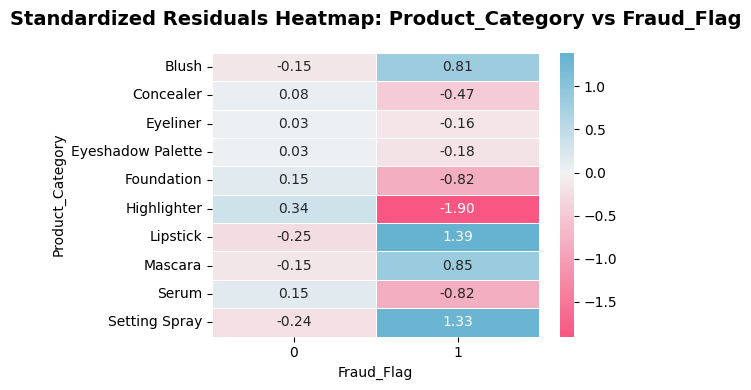

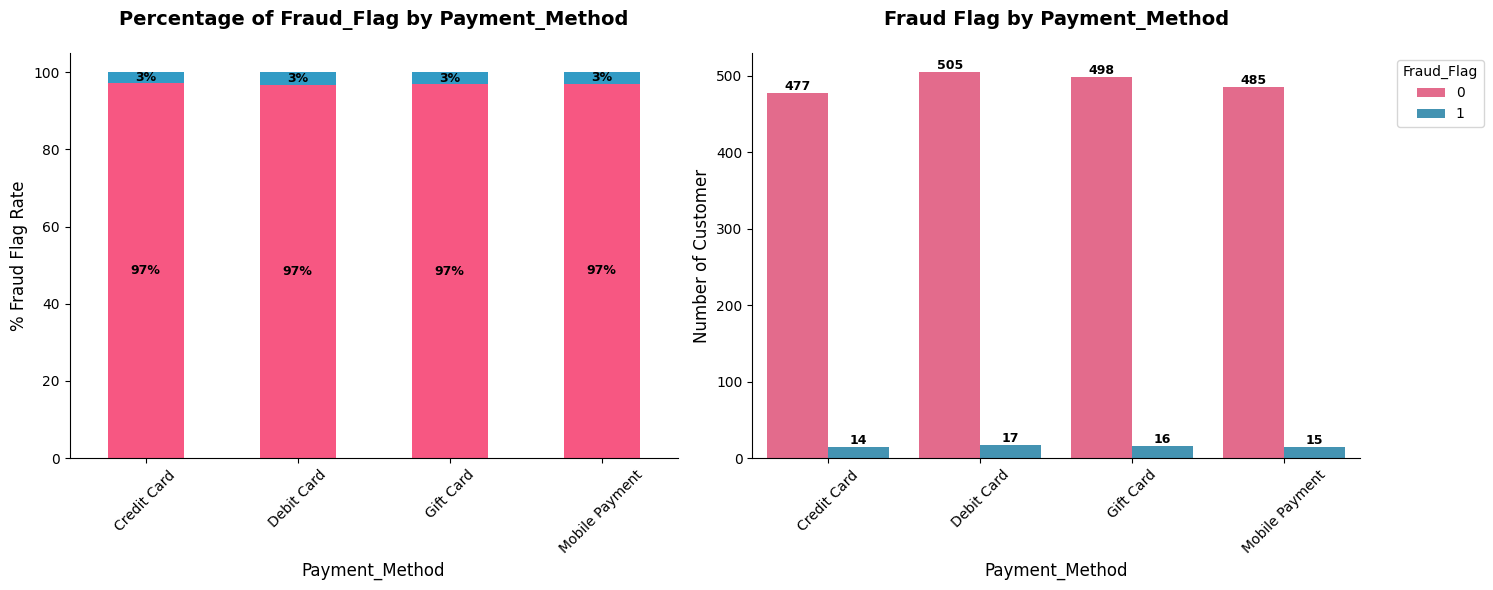


🔍 Chi-Square Test of Independence: 'Payment_Method' vs. 'Fraud_Flag'
Chi-squared statistic: 0.151
Degrees of freedom: 3
p-value: 0.985065
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Payment_Method' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag         0     1
Payment_Method            
Credit Card     0.05 -0.26
Debit Card     -0.05  0.26
Gift Card      -0.01  0.07
Mobile Payment  0.01 -0.08


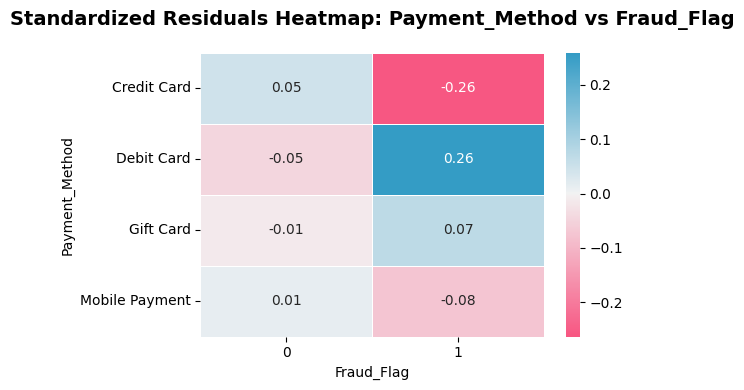

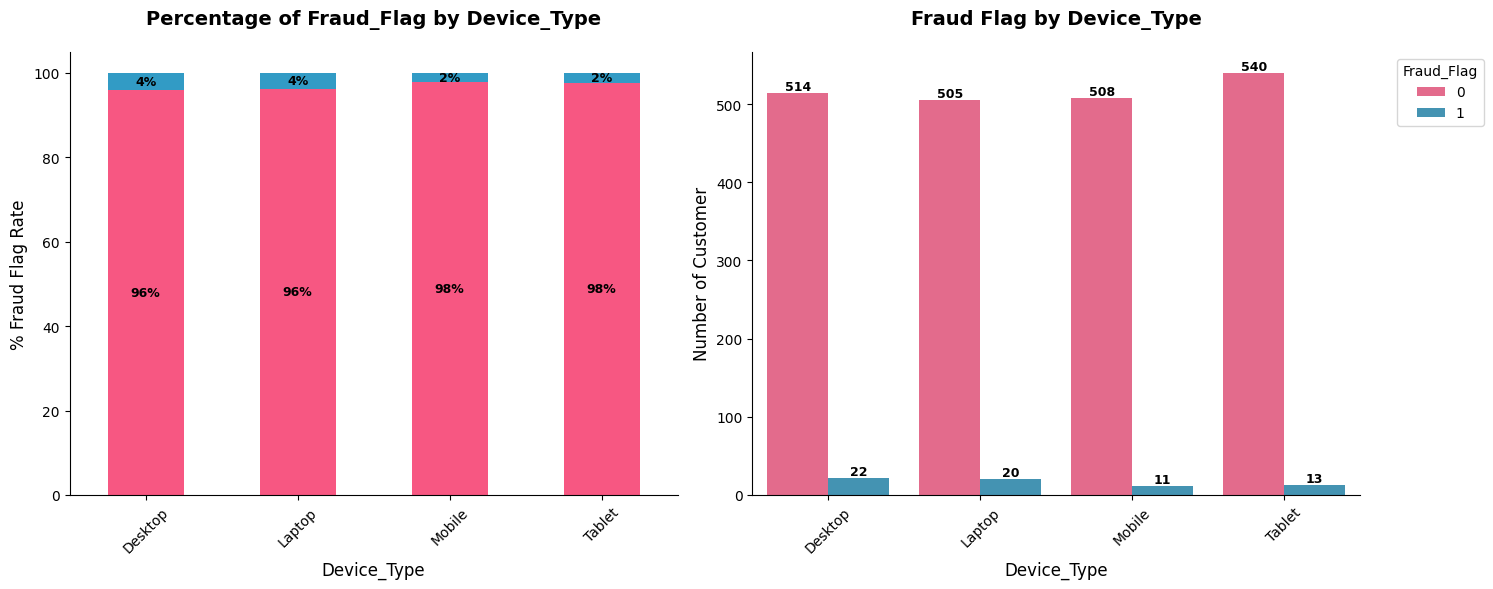


🔍 Chi-Square Test of Independence: 'Device_Type' vs. 'Fraud_Flag'
Chi-squared statistic: 5.384
Degrees of freedom: 3
p-value: 0.145736
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Device_Type' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag      0     1
Device_Type            
Desktop     -0.24  1.33
Laptop      -0.17  0.93
Mobile       0.23 -1.26
Tablet       0.18 -0.99


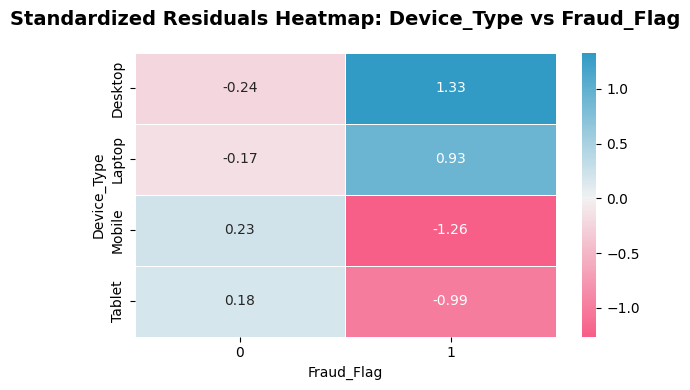

In [19]:
cat_features = ["Customer_Loyalty_Tier", "Country", "Store_ID", "Product_SKU", "Product_Category", "Payment_Method", "Device_Type"]
# Transaction_ID, Customer_ID
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by Fraud_Flag</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Fraud_Flag
    grouped = df.groupby([cat, "Fraud_Flag"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
    
    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.0f%%', label_type="center", weight="bold", fontsize=9)

    ax[0].set_title(f"Percentage of Fraud_Flag by {cat}", fontsize=14, weight="bold", pad=20)
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Fraud Flag Rate", fontsize=12)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=rot)
    ax[0].legend_.remove()
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Fraud_Flag", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=percentages.index, hue_order = [0, 1])
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=9, weight="bold")

    ax[1].set_title(f"Fraud Flag by {cat}", fontsize=14, weight="bold", pad=20)
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Fraud_Flag", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=rot)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Fraud_Flag", df=df, show_residuals=True)

for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_fraud, rot=45)

### Insight for Categorical Features by Fraud_Flag

`Customer_Loyalty_Tier`

* There is no statistical evidence supporting a relationship between customer tier and fraud occurrence.
* From a business perspective: although VIPs show a relatively higher fraud rate, the overall impact is small due to the limited number of VIP customers.
* Fraud cases are concentrated in larger customer groups like **Bronze** and **Silver**, simply because of their higher customer volumes.

`Country`

* There is no statistically significant evidence of a relationship between country and fraud.
* From a business perspective: while China and the USA show slightly elevated fraud activity.
* Countries like Monaco, Japan, and Switzerland appear to have **lower-than-expected fraud rates**, but the overall fraud volume is too small.

`Store_ID`

* There is **no significant statistical evidence** that fraud rates differ across stores.
* From a business view:

  * Fraud cases appear slightly higher at **Singapore Concession, Milan Popup, and Paris Flagship**, suggesting some localized risk patterns.
  * Fraud is slightly less than expected in **Dubai, NYC, and Rome** stores.
* However, these differences are not strong enough.

`Product_SKU`

* There is no statistical evidence that product type strongly affects fraud occurrence.
* From a business perspective: while some products like *ECLIPSE-EYE-10* and *CELESTE-EYE-05* show slightly higher fraud rates, the differences are not substantial enough to be considered strong predictive factors.

`Product_Category`

* There is no statistical evidence of a strong association between product category and fraud.
* From a business perspective: while *Lipstick* and *Setting Spray* show slightly more fraud cases than expected, *Highlighter* shows significantly fewer.

`Payment_Method`

* Fraud distribution is **uniform across payment methods**, with no significant differences.
* From a business standpoint: payment type **does not appear to be a risk factor** for fraud.

`Device_Type`

* There is no strong statistical evidence that device type is associated with fraud.
* From a business perspective: fraud cases appear somewhat more frequent on **Desktop/Laptop**, while **Mobile/Tablet** users have fewer fraud cases than expected.
* However, these differences are not significant enough to serve as a reliable fraud predictor.

| Feature                     | Type        | Statistical Test Used | Relationship with Fraud\_Flag | Summary                                                                                                                                                                           |
| --------------------------- | ----------- | --------------------- | ----------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Customer\_Loyalty\_Tier** | Categorical | Chi-Square Test       | Not Significant               | No statistical evidence of association. Fraud slightly higher in **VIP**, but overall impact is small. Fraud cases concentrate in **Bronze** and **Silver** due to large volumes. |
| **Country**                 | Categorical | Chi-Square Test       | Not Significant               | No significant relationship. **China** and **USA** show slightly higher fraud activity. **Monaco, Japan, Switzerland** show lower-than-expected fraud, but volumes are too small. |
| **Store\_ID**               | Categorical | Chi-Square Test       | Not Significant               | Fraud slightly higher at **Singapore Concession, Milan Popup, Paris Flagship**, lower at **Dubai, NYC, Rome**. Differences are not strong enough.                                 |
| **Product\_SKU**            | Categorical | Chi-Square Test       | Not Significant               | No significant effect. Slightly higher fraud in **ECLIPSE-EYE-10** and **CELESTE-EYE-05**, but differences are minor.                                                             |
| **Product\_Category**       | Categorical | Chi-Square Test       | Not Significant               | No significant association. Slightly higher fraud in **Lipstick, Setting Spray**, and lower in **Highlighter**.                                                                   |
| **Payment\_Method**         | Categorical | Chi-Square Test       | Not Significant               | Fraud distribution is **uniform across payment methods**. Payment type does not appear to be a risk factor.                                                                       |
| **Device\_Type**            | Categorical | Chi-Square Test       | Not Significant               | Fraud slightly higher in **Desktop/Laptop**, lower in **Mobile/Tablet**. Differences are not statistically significant.                                                           |
| **Customer\_Age**           | Numerical   | Mann–Whitney U Test   | Not Significant               | Fraudulent transactions occur across similar age ranges as legitimate ones. Age is not a strong discriminative feature.                                                           |
| **Purchase\_Amount**        | Numerical   | Mann–Whitney U Test   | Not Significant               | Fraudulent transactions have a **similar average purchase amount**. Slightly higher median in fraud cases but not strong enough for prediction.                                   |
| **Footfall\_Count**         | Numerical   | Mann–Whitney U Test   | Not Significant               | No clear differences between fraud and non-fraud cases.                                                                                                                           |


## Multivariate Analysis

### RFM Analysis

**Customer segmentation based on RFM Score**

| Segment                        | Description                                                                  | RFM Condition    |
| ------------------------------ | ---------------------------------------------------------------------------- | -------------------------- |
| **Champions / Best Customers** | Most valuable customers: recent activity, frequent transactions, high spend. | `R ≥ 4, F ≥ 4, M ≥ 4`      |
| **Loyal Customers**            | Loyal customers: purchase frequently and spend consistently well.            | `F ≥ 4, M ≥ 3`             |
| **Potential Loyalists**        | New customers with decent frequency/spending, potential to become loyal.     | `R ≥ 4, F ≥ 2`             |
| **At Risk**                    | Previously frequent/high spenders but inactive for a long time.              | `R ≤ 2, F ≥ 3`             |
| **New Customers**              | Recently joined, made transactions recently but with low frequency.          | `R ≥ 4, F = 1`             |
| **Hibernating / Churn**        | Customers inactive for a long time with low spending.                        | `R = 1, F = 1, M = 1`      |
| **Others**                     | Customers not falling into the above categories.                             | Different from above rules |


In [20]:
# Make sure type Transaction_Timestamp as datetime.
df_fraud["Transaction_Timestamp"] = pd.to_datetime(df_fraud["Transaction_Timestamp"], format="mixed")

recency_date = df_fraud["Transaction_Timestamp"].max() + pd.Timedelta(days=1)

rfm_df = df_fraud.groupby("Customer_ID").agg({
    "Transaction_Timestamp": lambda x: (recency_date - x.max()).days,   # Recency
    "Transaction_ID": "nunique",                                        # Frequency
    "Purchase_Amount": "sum"                                            # Monetary
}).reset_index()

rfm_df.columns = ["Customer_ID", "Recency", "Frequency", "Monetary"]
display(rfm_df.head())

,Customer_ID,Recency,Frequency,Monetary
0,001d3772-360f-455a-b16d-0faf018d9470,78,1,164.70
1,008348c6-138b-4231-8a28-8386f69c24e8,156,1,236.94
2,00ac49cb-23ea-46d3-bd56-660d16ee9974,4,1,208.51
3,00bdc439-e5dc-4ca3-a3da-b1eccbfecce4,63,1,62.00
4,00c1bab9-a602-452f-ba78-48e7f0eade27,100,1,238.12


In [21]:
rfm_df["R"] = pd.qcut(rfm_df["Recency"], 5, labels=[5,4,3,2,1])
rfm_df["F"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm_df["M"] = pd.qcut(rfm_df["Monetary"], 5, labels=[1,2,3,4,5])

rfm_df["RFM_Score"] = rfm_df["R"].astype(str) + rfm_df["F"].astype(str) + rfm_df["M"].astype(str)
display(rfm_df.head())

,Customer_ID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,001d3772-360f-455a-b16d-0faf018d9470,78,1,164.70,3,1,3,313
1,008348c6-138b-4231-8a28-8386f69c24e8,156,1,236.94,1,1,4,114
2,00ac49cb-23ea-46d3-bd56-660d16ee9974,4,1,208.51,5,1,4,514
3,00bdc439-e5dc-4ca3-a3da-b1eccbfecce4,63,1,62.00,4,1,1,411
4,00c1bab9-a602-452f-ba78-48e7f0eade27,100,1,238.12,3,1,4,314


In [22]:
def classify_rfm(row):
    r, f, m = row["R"], row["F"], row["M"]

    if r >= 4 and f >= 4 and m >= 4:
        return "Best Customers"
    elif f >= 4 and m >= 3:
        return "Loyal Customers"
    elif r >= 4 and f >= 2:
        return "Potential Loyalists"
    elif r <= 2 and f >= 3:
        return "At Risk"
    elif r >= 4  and f == 1:
        return "New Customers"
    elif r == 1  and f == 1 and m == 1:
        return "Churn Customers"
    else:
        return "Other"

rfm_df["RFM_Segment"] = rfm_df.apply(classify_rfm, axis=1)
display(rfm_df.head())

,Customer_ID,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment
0,001d3772-360f-455a-b16d-0faf018d9470,78,1,164.70,3,1,3,313,Other
1,008348c6-138b-4231-8a28-8386f69c24e8,156,1,236.94,1,1,4,114,Other
2,00ac49cb-23ea-46d3-bd56-660d16ee9974,4,1,208.51,5,1,4,514,New Customers
3,00bdc439-e5dc-4ca3-a3da-b1eccbfecce4,63,1,62.00,4,1,1,411,New Customers
4,00c1bab9-a602-452f-ba78-48e7f0eade27,100,1,238.12,3,1,4,314,Other


In [23]:
# Reference from Google
# Create a layout with clear headers, centered text, and nicely formatted numbers
summary_rfm = (
    rfm_df.groupby("RFM_Segment").agg({
        "Recency": ["mean", "min", "max"],
        "Frequency": ["mean", "min", "max"],
        "Monetary": ["mean", "min", "max"],
        "Customer_ID": "count"
    })
    .sort_values(("Monetary", "mean"), ascending=False)
    .style
    .set_caption("RFM Summary by Segment")
    .format(precision=0)  # Round numbers
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
    ])
    .set_properties(**{
        "text-align": "center",
        "font-size": "12px"
    })
    .background_gradient(subset=[("Recency", "mean"), ("Frequency", "mean"), ("Monetary", "mean"), ("Customer_ID", "count")], cmap="Blues")
)
summary_rfm


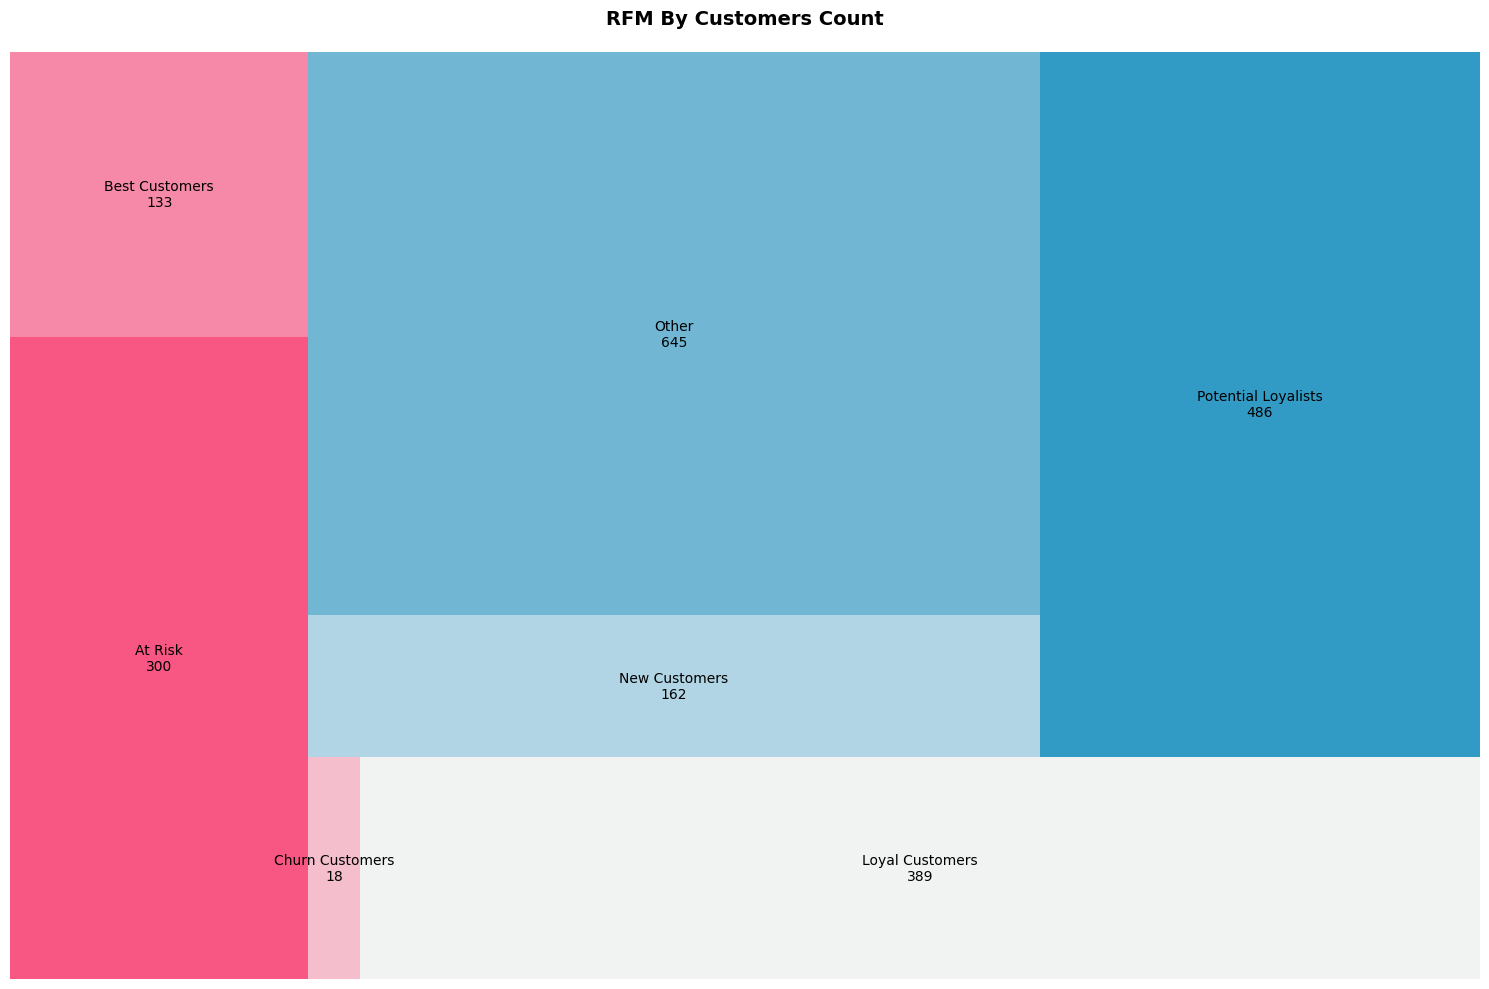

In [24]:
import squarify

rfm_df = rfm_df.astype({
    "R": "int8",
    "F": "int8",
    "M": "int8"
})

rfm_summarised = rfm_df.groupby (by = "RFM_Segment", as_index = False)\
                        .agg (
                            customersCount = ("Customer_ID", "nunique"),
                            total_R = ("R", "sum"),
                            total_F = ("F", "sum"),
                            total_M = ("M", "sum")
                        )

plt.figure(figsize=(15, 10))
squarify.plot(
    rfm_summarised["customersCount"].to_list(),
    label = rfm_summarised["RFM_Segment"] + "\n" + rfm_summarised["customersCount"].astype(str),
    color = color(n_colors=rfm_df["RFM_Segment"].nunique())
)
plt.title ("RFM By Customers Count", fontsize=14, pad=20, weight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

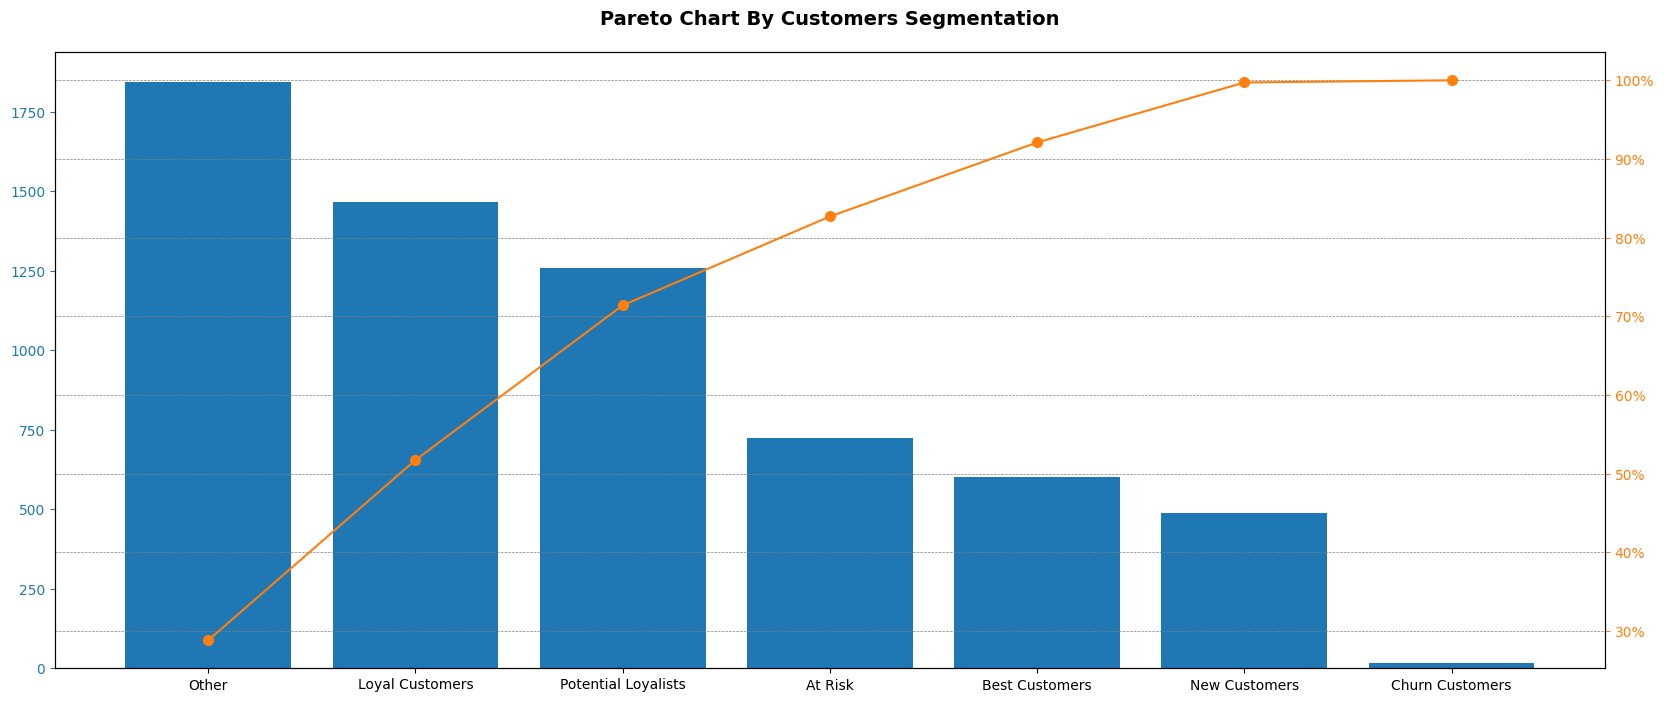

In [25]:
from matplotlib.ticker import PercentFormatter
rfm_summarised = rfm_summarised.sort_values(by="total_M",ascending=False)
rfm_summarised["cumpercentage"] = rfm_summarised["total_M"].cumsum()/rfm_summarised["total_M"].sum()*100
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(rfm_summarised["RFM_Segment"], rfm_summarised["total_M"], color="C0")
ax2 = ax.twinx()
ax2.plot(rfm_summarised["RFM_Segment"], rfm_summarised["cumpercentage"], color="C1", marker="o", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.grid(color = "gray", linestyle = "--", linewidth = 0.5)
plt.title ("Pareto Chart By Customers Segmentation", fontsize=14, pad=20, weight="bold")
plt.show()

#### RFM Segmentation Overview Analysis

**1. Customer distribution by segment**

* **Other (645 customers)**: Largest group. These are average customers without strong RFM signals. They contribute stable but not high revenue.
* **Loyal Customers (389 customers)**: Stable buyers with consistent purchases and high spending (average Monetary ≈ 212).
* **Potential Loyalists (486 customers)**: Show similar behavior to loyal customers, with short Recency (≈37 days). They need nurturing strategies to grow into loyal customers.
* **Best Customers (133 customers)**: The most valuable segment, very recent activity (Recency ≈34 days) and highest Monetary (≈253). They are the “backbone” of revenue.
* **New Customers (162 customers)**: Recently acquired (Recency ≈32), with modest spending (≈175). They need strong onboarding and positive experiences to retain.
* **At Risk (300 customers)**: Long Recency (≈146), historically spent significantly but haven’t returned recently → risk of churn.
* **Churn Customers (18 customers)**: Almost lost (Recency ≈160, low Monetary ≈77), very small in number and value.

**2. Key characteristics from RFM Summary**

* **Best Customers**: Highest spending → should be prioritized with special care, exclusive offers, and loyalty rewards.
* **Loyal Customers**: Large base and consistent contributors → maintain with loyalty programs and personalized engagement.
* **Potential Loyalists**: Growth opportunity → encourage more frequent purchases to move them into the loyal group.
* **At Risk & Churn**: Warning signals → reactivation campaigns (discounts, retention emails) may help, but Churn should be low priority due to small size and low value.
* **Other**: Largest group → act as the foundation, can be filtered and nurtured to move them toward higher-value segments.

**3. Pareto Chart Insights**

* According to the Pareto distribution, **Other, Loyal Customers, and Potential Loyalists** account for \~70–80% of customers.
* **Best Customers** and **At Risk** also contribute meaningfully but are smaller in size.
* **Churn Customers** are negligible in terms of overall impact.

**Key takeaways**

* **Best Customers & Loyal Customers** → core of revenue.
* **Potential Loyalists & New Customers** → opportunity for growth, should be nurtured strategically.
* **At Risk & Churn** → warning signals, selective reactivation strategies needed.
* **Other** → large volume, potential to convert into higher-value customers.

### Cohort Analysis

With this dataset (2133 customers, each with **Transaction\_Timestamp, Customer\_ID, Transaction\_ID, Purchase\_Amount…**):

* **RFM analysis** is feasible (as you’re already doing) since it’s based on **individual customer behavior** (Recency – Frequency – Monetary).
* **Cohort analysis** (tracking behavior over months/quarters) is **not suitable** unless:

  * Each customer has **multiple repeat transactions across different time periods**.
  * `Transaction_Timestamp` spans a sufficiently long period (e.g., several months or years).

👉 But if the dataset only has 2133 customers and each has very few transactions (only 1 or a couple), then cohort analysis will **not yield meaningful insights** because:

* Cohorts are typically used to analyze **retention/loyalty** by customer acquisition batches (e.g., customers who joined in January—after 6 months, what % are still active?).
* If most customers have only **a single transaction**, retention will essentially be **0** right after the first period → not meaningful.

### QoQ Analysis

In [26]:
df_fraud["quarter"] = df_fraud["Transaction_Timestamp"].dt.to_period("Q").astype(str)

quarterly_summary = df_fraud.groupby("quarter").agg(
    revenue=("Purchase_Amount", "sum"),
    account_count=("Customer_ID", "nunique")
).reset_index()

# Calculate revenue growth (QoQ growth)
quarterly_summary["qoq_growth"] = quarterly_summary["revenue"].pct_change() * 100
quarterly_summary["qoq_growth"] = quarterly_summary["qoq_growth"].round(2)
quarterly_summary["qoq_growth_label"] = quarterly_summary["qoq_growth"].apply(
    lambda x: f"+{x}%" if pd.notnull(x) and x > 0 else (f"{x}%" if pd.notnull(x) else "–")
)
quarterly_summary

,quarter,revenue,account_count,qoq_growth,qoq_growth_label
0,2025Q1,90149.80,530,NaN,–
1,2025Q2,185199.67,1063,105.44,+105.44%
2,2025Q3,97102.35,540,-47.57,-47.57%


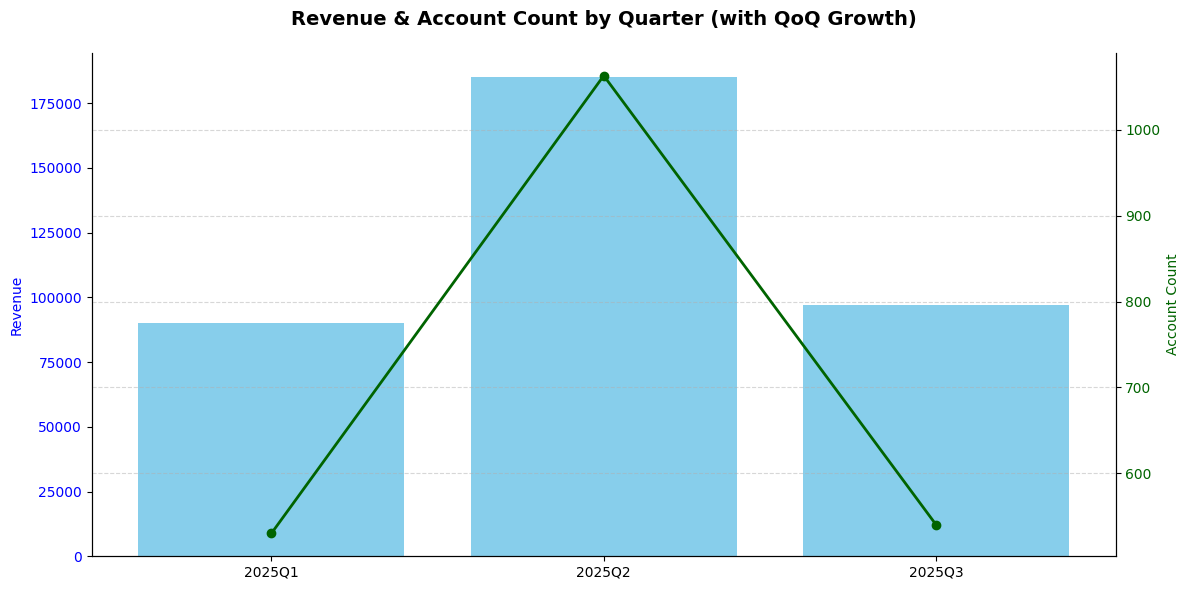

In [27]:
# Plot the chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Revenue bars
ax1.bar(quarterly_summary["quarter"], quarterly_summary["revenue"], color="skyblue", label="Revenue")
ax1.set_ylabel("Revenue", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Secondary axis for line chart (Account Count)
ax2 = ax1.twinx()
ax2.plot(quarterly_summary["quarter"], quarterly_summary["account_count"], color="darkgreen",
         marker="o", linewidth=2, label="Account Count")
ax2.set_ylabel("Account Count", color="darkgreen")
ax2.tick_params(axis="y", labelcolor="darkgreen")

# Add title and format axes
plt.title("Revenue & Account Count by Quarter (with QoQ Growth)", fontsize=14, fontweight="bold", pad=20)
plt.xticks(rotation=45)
sns.despine(top=True, right=False, left=False, bottom=False)
fig.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Insights from Revenue & Account Count by Quarter

**1. Revenue by quarter**

* **2025Q1**: \~90K
* **2025Q2**: surged to \~185K (almost double Q1).
* **2025Q3**: dropped to \~98K (still slightly above Q1 but much lower than Q2).
  👉 Q2 was the peak revenue quarter, but the momentum was **not sustained** in Q3.

**2. Account count by quarter**

* **2025Q1**: \~550 accounts.
* **2025Q2**: jumped to over \~1000 accounts.
* **2025Q3**: fell back to \~550 accounts, nearly the same as Q1.
  👉 This shows significant volatility, likely due to a short-term acquisition campaign (promotion, marketing push) in Q2.

**3. Relationship between Revenue and Account Count**

* Revenue and account count **moved in the same direction**: both spiked in Q2, then declined in Q3.
* However, even though **account count in Q3** returned to \~550 (similar to Q1), **revenue in Q3** (\~98K) was higher than Q1 (\~90K).
  👉 This suggests that **average spending per account in Q3 was higher than in Q1** → fewer customers, but they spent more.

**4. Key takeaways**

* **Q2 was the peak** in both customers and revenue.
* **Q3 saw a sharp drop in customers**, but **higher spending per customer** compared to Q1.

### CLV Analysis

**1. Definition**

* **CLV** = the total expected profit value from a customer over the entire duration of their relationship with the company.
* It answers the question: **“How much lifetime value does one customer bring to the business?”**

**2. How to calculate CLV in your dataset**

With transaction-level data, we can calculate **basic CLV** in 3 steps:

**Average Purchase Value (APV)**

$$
APV = \frac{\text{Total Revenue}}{\text{Total Transactions}}
$$

**Purchase Frequency (PF)**

$$
PF = \frac{\text{Total Transactions}}{\text{Total Customers}}
$$

**Customer Value (CV)**

$$
CV = APV \times PF
$$

**Average Customer Lifespan (ACL)**

* Based on `Transaction_Timestamp`: calculate the average number of days/months from the first to the last purchase for each customer.
* Example: if a customer purchased consistently over 12 months → ACL ≈ 1 year.

**Customer Lifetime Value (CLV)**

$$
CLV = CV \times ACL
$$

**3. Managerial implications**

* **Compare with CAC (Customer Acquisition Cost)**:

  * If CLV ≫ CAC → sustainable marketing strategy.
  * If CLV ≈ or < CAC → acquisition cost needs optimization.
* **Customer segmentation**:

  * High CLV group → invest in retention, upsell/cross-sell.
  * Low CLV group → consider optimizing service costs or reactivation campaigns.
* **Revenue forecasting**:

  * Average CLV × number of customers = estimated future revenue.

In [28]:
# Compute average purchase value (APV), purchase frequency, and lifespan
clv_df = df_fraud.groupby("Customer_ID").agg(
    Total_Revenue=("Purchase_Amount", "sum"),
    Num_Transactions=("Transaction_ID", "nunique"),
    First_Purchase=("Transaction_Timestamp", "min"),
    Last_Purchase=("Transaction_Timestamp", "max")
).reset_index()

display(clv_df.head())

,Customer_ID,Total_Revenue,Num_Transactions,First_Purchase,Last_Purchase
0,001d3772-360f-455a-b16d-0faf018d9470,164.70,1,2025-05-27 11:44:15,2025-05-27 11:44:15
1,008348c6-138b-4231-8a28-8386f69c24e8,236.94,1,2025-03-10 01:53:07,2025-03-10 01:53:07
2,00ac49cb-23ea-46d3-bd56-660d16ee9974,208.51,1,2025-08-09 00:15:02,2025-08-09 00:15:02
3,00bdc439-e5dc-4ca3-a3da-b1eccbfecce4,62.00,1,2025-06-11 14:00:12,2025-06-11 14:00:12
4,00c1bab9-a602-452f-ba78-48e7f0eade27,238.12,1,2025-05-05 09:24:29,2025-05-05 09:24:29


Average CLV across all customers: 174.61


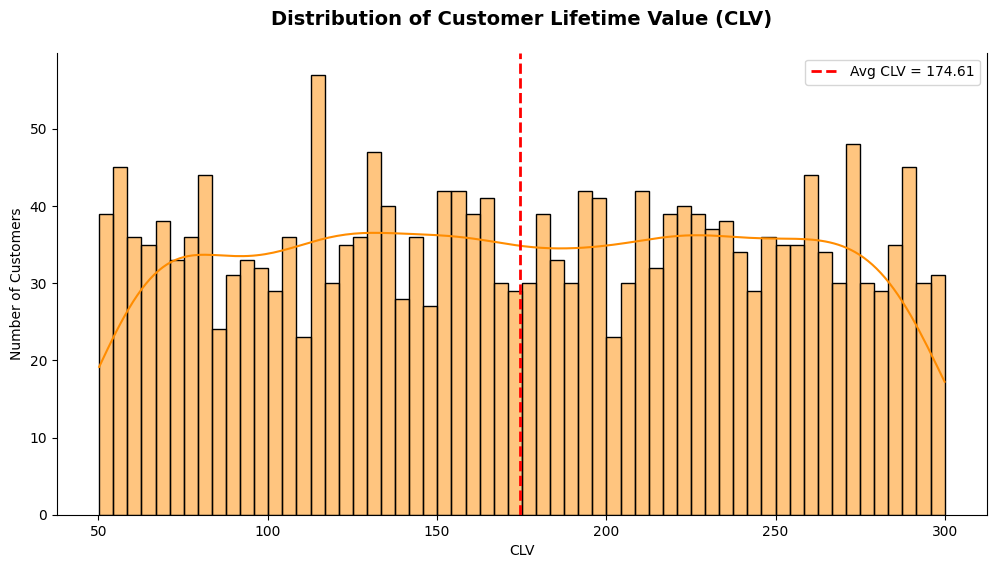

Top 10 High-Value Customers:


,Customer_ID,Total_Revenue,Num_Transactions,First_Purchase,Last_Purchase,APV,Frequency,Lifespan_Months,CLV
192,18fe1a22-6405-4333-8de2-155667080a35,299.91,1,2025-08-05 07:31:35,2025-08-05 07:31:35,299.91,1,1.0,299.91
514,3f160312-fdba-4b34-aea9-e88855c986bd,299.83,1,2025-07-13 14:06:08,2025-07-13 14:06:08,299.83,1,1.0,299.83
440,35c2cfa0-e200-4cad-a241-351112185195,299.77,1,2025-07-21 23:07:30,2025-07-21 23:07:30,299.77,1,1.0,299.77
495,3c945570-5c05-4bdc-8cd9-efdc73402455,299.49,1,2025-08-11 00:24:43,2025-08-11 00:24:43,299.49,1,1.0,299.49
1016,7b8ad07b-bb99-48d9-bc5d-6ab19914c8ab,299.39,1,2025-03-08 12:56:40,2025-03-08 12:56:40,299.39,1,1.0,299.39
1179,8e919042-af78-45a6-acd9-db3b0fede8cf,299.31,1,2025-04-11 20:46:39,2025-04-11 20:46:39,299.31,1,1.0,299.31
92,0aa83a64-c4b5-4d0b-b28a-cf471be169f8,299.30,1,2025-07-20 12:23:32,2025-07-20 12:23:32,299.30,1,1.0,299.30
1691,ccee5506-d780-4aee-9fe8-7ef7d929d4b7,299.21,1,2025-07-30 05:40:43,2025-07-30 05:40:43,299.21,1,1.0,299.21
2010,f20a0d23-19df-4418-bdf7-98913d44ec01,298.89,1,2025-06-25 12:40:00,2025-06-25 12:40:00,298.89,1,1.0,298.89
1724,d03b3f60-2186-48fe-9497-0f2a320d671e,298.61,1,2025-06-06 17:18:40,2025-06-06 17:18:40,298.61,1,1.0,298.61


In [29]:
# Average purchase value per transaction
clv_df["APV"] = clv_df["Total_Revenue"] / clv_df["Num_Transactions"]

# Frequency (number of transactions)
clv_df["Frequency"] = clv_df["Num_Transactions"]

# Lifespan: number of months between first and last purchase (+1 to avoid division by zero)
clv_df["Lifespan_Months"] = ((clv_df["Last_Purchase"] - clv_df["First_Purchase"]).dt.days / 30).clip(lower=1)

# Customer Lifetime Value
clv_df["CLV"] = clv_df["APV"] * clv_df["Frequency"] * clv_df["Lifespan_Months"]

# --- 2. Calculate the average CLV across all customers ---
avg_clv = clv_df["CLV"].mean()
print(f"Average CLV across all customers: {avg_clv:.2f}")

# --- 3. Plot CLV distribution with Seaborn ---
plt.figure(figsize=(12,6))
sns.histplot(clv_df["CLV"], bins=60, edgecolor="black", kde=True, color="darkorange")
sns.despine(top=True, right=False, left=False, bottom=False)

# Add vertical line for average CLV
plt.axvline(avg_clv, color="red", linestyle="dashed", linewidth=2, label=f"Avg CLV = {avg_clv:.2f}")

# Titles and labels
plt.title("Distribution of Customer Lifetime Value (CLV)", fontsize=14, fontweight="bold", pad=20)
plt.xlabel("CLV")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

# Display top customers with highest CLV (VIP customers)
print("Top 10 High-Value Customers:")
display(clv_df.sort_values(by="CLV", ascending=False).head(10))

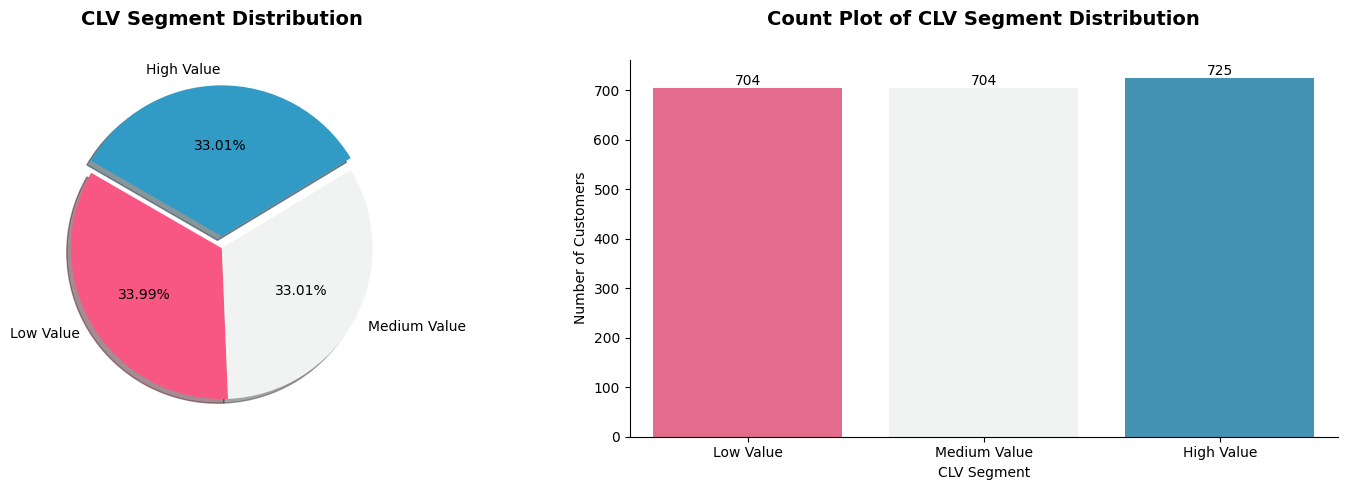

In [30]:
q33 = clv_df["CLV"].quantile(0.33)
q66 = clv_df["CLV"].quantile(0.66)

# Function to classify customers
def clv_segment(x):
    if x <= q33:
        return "Low Value"
    elif x <= q66:
        return "Medium Value"
    else:
        return "High Value"

# Add Segment column
clv_df["CLV_Segment"] = clv_df["CLV"].apply(clv_segment)

# Segment distribution
CLV_Segment_Distribution = clv_df["CLV_Segment"].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
n_color = color(n_colors=clv_df["CLV_Segment"].nunique())

# ax[0] – Pie chart
ax[0].pie(
    CLV_Segment_Distribution,
    labels=["Low Value", "Medium Value", "High Value"],
    colors=n_color,
    autopct="%1.2f%%",
    startangle=150,
    explode=(0, 0, 0.08),
    shadow=True
)
ax[0].set_title("CLV Segment Distribution", weight="bold", fontsize=14, pad=25)

# ax[1] – Count plot
sns.countplot(
    data=clv_df,
    x="CLV_Segment",
    palette=n_color,
    ax=ax[1],
    order=["Low Value", "Medium Value", "High Value"]
)
ax[1].set_title("Count Plot of CLV Segment Distribution", weight="bold", fontsize=14, pad=25)

# Add labels on top of bars
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10)

ax[1].set_ylabel("Number of Customers")
ax[1].set_xlabel("CLV Segment")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()


#### Insights CLV Segment

**1. CLV Distribution**

* The distribution chart shows CLV values ranging from **\~50 to \~300**.
* **Average CLV ≈ 175**.
* The distribution curve is relatively flat → no extreme concentration at a single CLV level → customer value is fairly spread out, neither heavily skewed to very high nor very low groups.

**2. CLV Segmentation (Low, Medium, High Value)**

* Based on quantiles, customers are nearly evenly split:

  * **Low Value**: \~704 customers (\~34%)
  * **Medium Value**: \~704 customers (\~33%)
  * **High Value**: \~725 customers (\~33%)
* The ratio across the three segments is well balanced, meaning the dataset is not skewed toward any single group.

**3. Managerial Implications**

* **High Value (≈ 33%)**: These customers contribute the most revenue, and should be prioritized for retention strategies (loyalty programs, upsell/cross-sell campaigns).
* **Medium Value (≈ 33%)**: This group has potential to move up into High Value with the right engagement — focus on personalized experiences and targeted offers.
* **Low Value (≈ 34%)**: Contribute the least, but still important for overall market coverage. Consider reactivation campaigns or optimizing servicing costs.

**Key Takeaways**

* Average CLV is around **175**, with segments evenly distributed.
* No extreme imbalances → the customer base is diverse but balanced.
* Strategy should focus on:

  * Retaining the **High Value** group.
  * Growing the **Medium Value** group into High Value.
  * Optimizing cost and re-engagement strategies for the **Low Value** group.

### Let's some business questions?

#### Do VIP/Platinum customers tend to commit fraud more often when using credit cards?

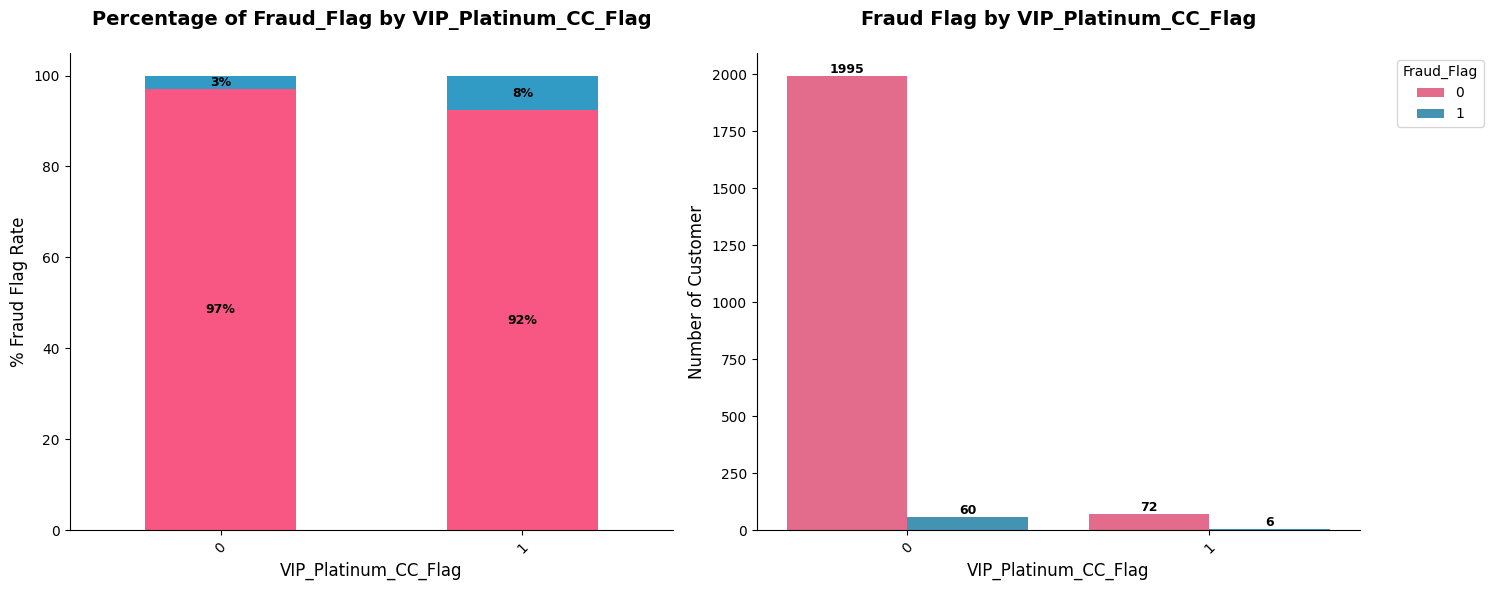


🔍 Chi-Square Test of Independence: 'VIP_Platinum_CC_Flag' vs. 'Fraud_Flag'
Chi-squared statistic: 4.228
Degrees of freedom: 1
p-value: 0.039767
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'VIP_Platinum_CC_Flag' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag               0     1
VIP_Platinum_CC_Flag            
0                     0.08 -0.45
1                    -0.41  2.31


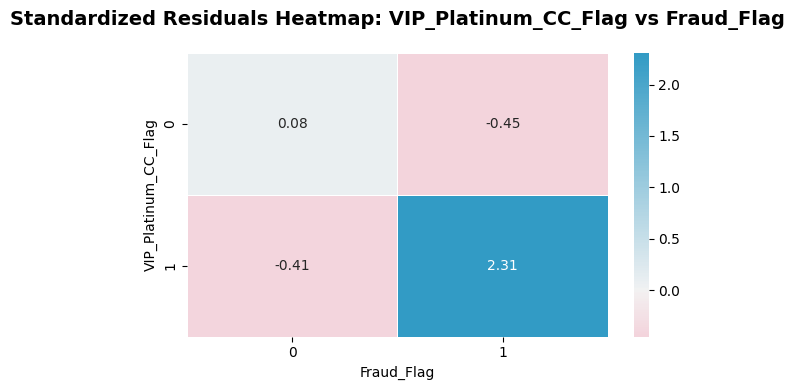

In [31]:
df_fraud_bq = df_fraud.copy()

df_fraud_bq["VIP_Platinum_CC_Flag"] = (
    df_fraud_bq["Customer_Loyalty_Tier"].isin(["VIP", "Platinum"]) &
    (df_fraud_bq["Payment_Method"] == "Credit Card")
).astype("int8")

bivariate_percent_plot(cat="VIP_Platinum_CC_Flag", df= df_fraud_bq, rot=45)

**Answer**

Even though the **absolute number of fraud cases is not large**, the **VIP/Platinum + Credit Card group** shows an abnormally high fraud rate, and the difference is statistically significant

#### Are there differences in fraud between **lower tiers (Bronze/Silver)** and **higher tiers (VIP/Platinum)** across payment methods?

In [32]:
def map_loyalty(tier):
    if tier in ["Bronze", "Silver"]:
        return "Low_Tier"
    elif tier in ["VIP", "Platinum"]:
        return "High_Tier"
    else:
        return "Other"

df_fraud_bq["Tier_Group"] = df_fraud_bq["Customer_Loyalty_Tier"].apply(map_loyalty)

fraud_by_tier_payment = pd.crosstab(
    [df_fraud_bq["Tier_Group"], df_fraud_bq["Payment_Method"]],
    df_fraud_bq["Fraud_Flag"],
    normalize="index"
) * 100

display(fraud_by_tier_payment)

contingency = pd.crosstab(
    [df_fraud_bq["Tier_Group"], df_fraud_bq["Payment_Method"]],
    df_fraud_bq["Fraud_Flag"]
)
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)

Fraud_Flag                         0         1
Tier_Group Payment_Method                     
High_Tier  Credit Card     92.307692  7.692308
           Debit Card      97.101449  2.898551
           Gift Card       95.161290  4.838710
           Mobile Payment  98.484848  1.515152
Low_Tier   Credit Card     97.916667  2.083333
           Debit Card      96.238245  3.761755
           Gift Card       97.500000  2.500000
           Mobile Payment  96.496815  3.503185
Other      Credit Card     97.916667  2.083333
           Debit Card      97.058824  2.941176
           Gift Card       96.363636  3.636364
           Mobile Payment  98.039216  1.960784

Chi2: 9.50881472848782 p-value: 0.5750333996619383


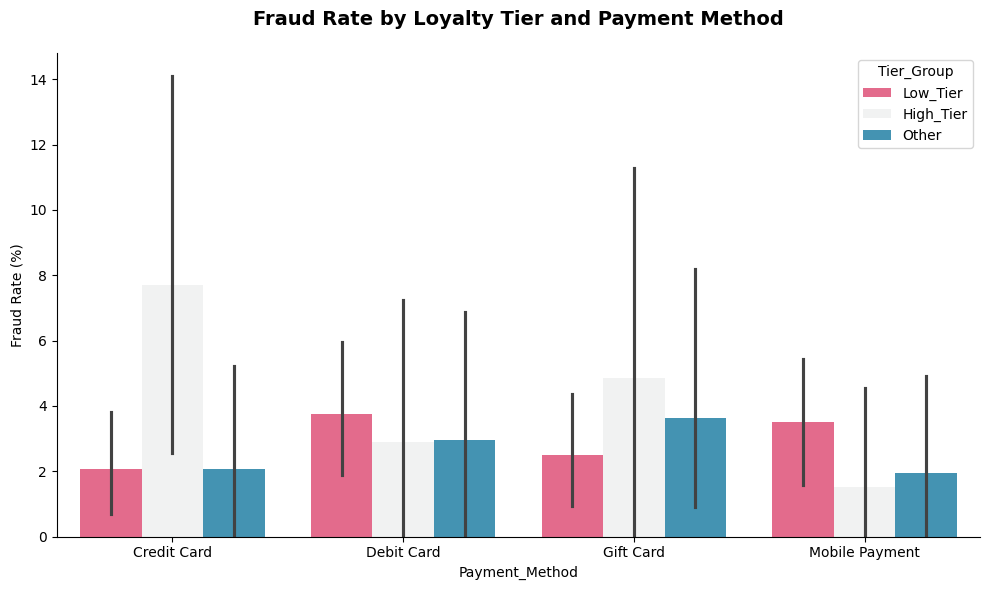

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_fraud_bq, x="Payment_Method", y="Fraud_Flag", hue="Tier_Group", palette=color(n_colors=3),
    estimator=lambda x: 100 * sum(x) / len(x)
)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by Loyalty Tier and Payment Method", weight="bold", fontsize=14, pad=20)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Chi2: 9.5088 | dof: 11 | p-value: 0.575033


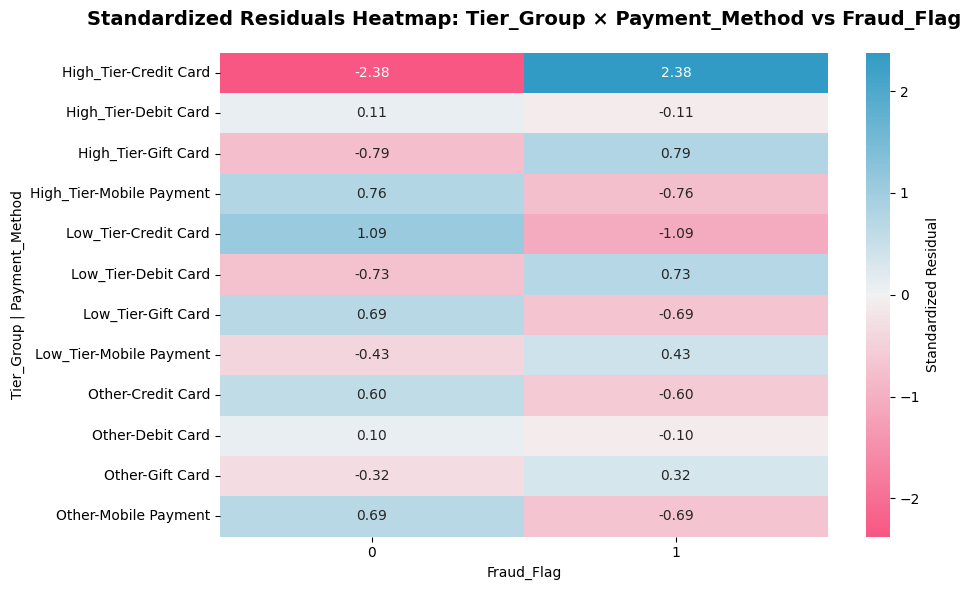

In [34]:
# 1) Create contingency table Tier_Group x Payment_Method x Fraud_Flag
ct = pd.crosstab(
    [df_fraud_bq["Tier_Group"], df_fraud_bq["Payment_Method"]],
    df_fraud_bq["Fraud_Flag"]
).sort_index()

# 2) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(ct.values)
expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 3) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = ct.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = ct.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = ct.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (ct.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=ct.index, columns=ct.columns)

# 4) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: Tier_Group × Payment_Method vs Fraud_Flag", weight="bold", fontsize=14, pad=20)
plt.ylabel("Tier_Group | Payment_Method")
plt.xlabel("Fraud_Flag")
plt.tight_layout()
plt.show()

**Answer**

* Although **High Tier + Credit Card** shows a fraud rate almost **3 times higher** than Low Tier, statistically speaking there is **not enough strong evidence** to conclude that loyalty tier and payment method significantly impact fraud.
* This could still be considered a **“risk pattern”** worth including in a fraud detection model (feature engineering), but cannot be taken as a definitive conclusion from statistical testing alone (`VIP_Platinum_CC_Flag`).

#### Are fraudulent transactions more concentrated on **Desktop devices** and in specific locations?

In [35]:
df_desktop = df_fraud_bq[df_fraud_bq["Device_Type"] == "Desktop"]
fraud_by_desktop_country = pd.crosstab(
    [df_desktop["Device_Type"], df_desktop["Country"]],
    df_desktop["Fraud_Flag"],
    normalize="index"
) * 100

display(fraud_by_desktop_country)

contingency_desktop_country = pd.crosstab(
    [df_desktop["Device_Type"], df_desktop["Country"]],
    df_desktop["Fraud_Flag"]
)
chi2, p, dof, ex = chi2_contingency(contingency_desktop_country)
print("Chi2:", chi2, "p-value:", p)

Fraud_Flag                        0         1
Device_Type Country                          
Desktop     Australia     96.000000  4.000000
            China         93.877551  6.122449
            France        96.551724  3.448276
            Italy         96.000000  4.000000
            Japan        100.000000  0.000000
            Monaco        98.245614  1.754386
            Singapore     97.142857  2.857143
            Switzerland   98.245614  1.754386
            UAE          100.000000  0.000000
            UK            96.153846  3.846154
            USA           92.307692  7.692308

Chi2: 8.663731701427215 p-value: 0.5642860083185283


Chi2: 8.6637 | dof: 10 | p-value: 0.564286


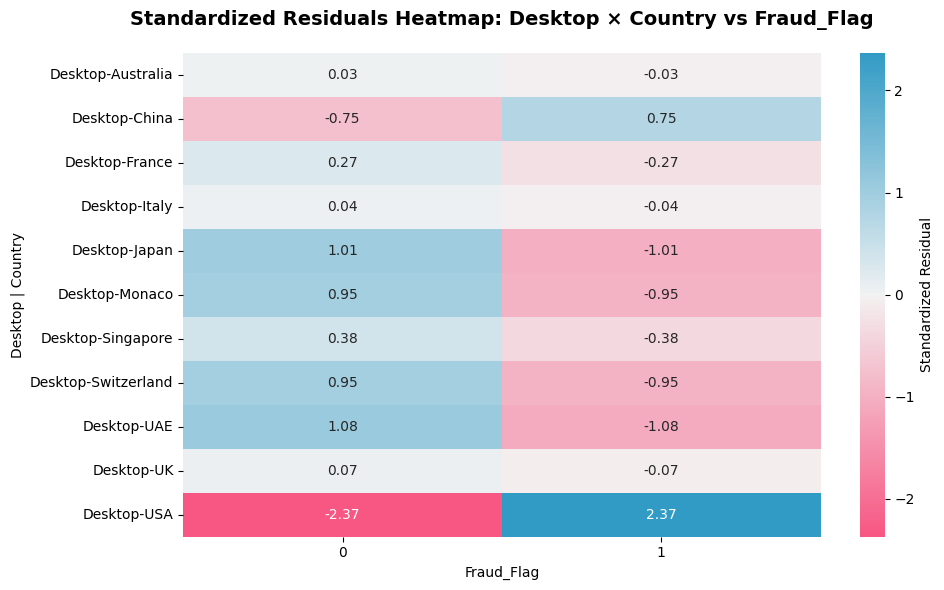

In [36]:
# 1) Create contingency table Tier_Group x Payment_Method x Fraud_Flag
ct_desktop_country = pd.crosstab(
    [df_desktop["Device_Type"], df_desktop["Country"]],
    df_desktop["Fraud_Flag"]
).sort_index()

# 2) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(ct_desktop_country.values)
expected_df = pd.DataFrame(expected, index=ct_desktop_country.index, columns=ct_desktop_country.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 3) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = ct_desktop_country.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = ct_desktop_country.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = ct_desktop_country.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (ct_desktop_country.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=ct_desktop_country.index, columns=ct_desktop_country.columns)

# 4) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: Desktop × Country vs Fraud_Flag", weight="bold", fontsize=14, pad=20)
plt.ylabel("Desktop | Country")
plt.xlabel("Fraud_Flag")
plt.tight_layout()
plt.show()

**Answer**

* **Risk Pattern Signal**: Fraud on Desktop **concentrates most in the USA**, followed by **China** → this could be an important factor to engineer as a feature in a fraud detection model.
* However, since the p-value is large → **statistically, we cannot conclude with confidence** that country alone drives fraud within the Desktop group.

#### Do mobile (Mobile/Tablet) fraud cases tend to occur more frequently in certain regions?

In [37]:
df_mobile_tablet = df_fraud_bq[(df_fraud_bq["Device_Type"] == "Tablet") | (df_fraud_bq["Device_Type"] == "Mobile")]
fraud_by_mobile_tablet_country = pd.crosstab(
    [df_mobile_tablet["Device_Type"], df_mobile_tablet["Country"]],
    df_mobile_tablet["Fraud_Flag"],
    normalize="index"
) * 100

display(fraud_by_mobile_tablet_country)

contingency_mobile_tablet_country = pd.crosstab(
    [df_mobile_tablet["Device_Type"], df_mobile_tablet["Country"]],
    df_mobile_tablet["Fraud_Flag"]
)
chi2, p, dof, ex = chi2_contingency(contingency_mobile_tablet_country)
print("Chi2:", chi2, "p-value:", p)

Fraud_Flag                        0         1
Device_Type Country                          
Mobile      Australia    100.000000  0.000000
            China         98.275862  1.724138
            France        97.959184  2.040816
            Italy        100.000000  0.000000
            Japan         96.666667  3.333333
            Monaco       100.000000  0.000000
            Singapore    100.000000  0.000000
            Switzerland   95.744681  4.255319
            UAE           96.551724  3.448276
            UK           100.000000  0.000000
            USA           95.967742  4.032258
Tablet      Australia     93.939394  6.060606
            China         95.081967  4.918033
            France        98.245614  1.754386
            Italy         95.833333  4.166667
            Japan        100.000000  0.000000
            Monaco        97.727273  2.272727
            Singapore     96.774194  3.225806
            Switzerland  100.000000  0.000000
            UAE          100.000000  0.000000
            UK            93.750000  6.250000
            USA           99.264706  0.735294

Chi2: 18.816794379968876 p-value: 0.5968913519298871


Chi2: 18.8168 | dof: 21 | p-value: 0.596891


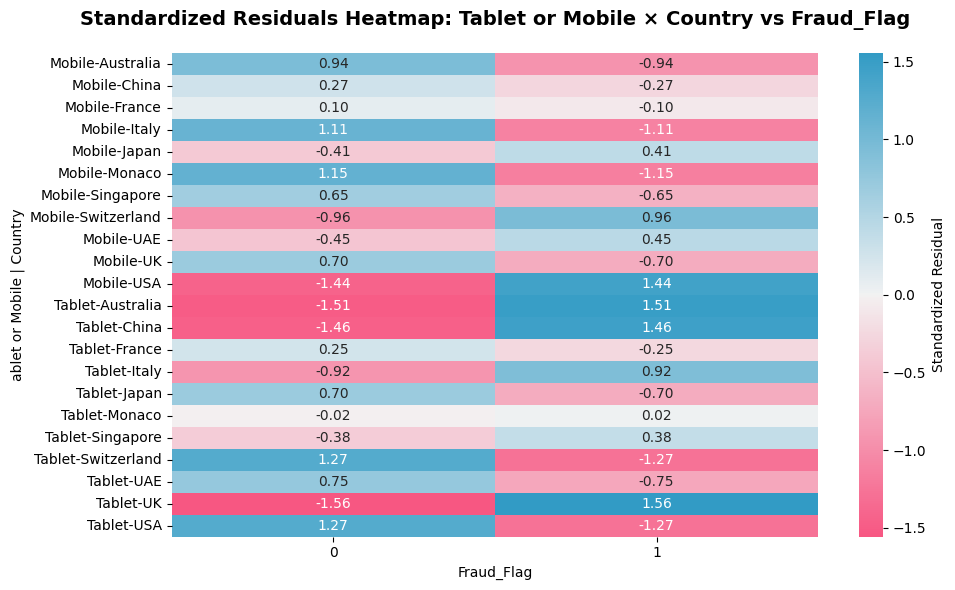

In [38]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency_mobile_tablet_country.values)
expected_df = pd.DataFrame(expected, index=contingency_mobile_tablet_country.index, columns=contingency_mobile_tablet_country.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency_mobile_tablet_country.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency_mobile_tablet_country.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency_mobile_tablet_country.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency_mobile_tablet_country.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency_mobile_tablet_country.index,
                            columns=contingency_mobile_tablet_country.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: Tablet or Mobile × Country vs Fraud_Flag", weight="bold", fontsize=14, pad=20)
plt.ylabel("ablet or Mobile | Country")
plt.xlabel("Fraud_Flag")
plt.tight_layout()
plt.show()

**Answer**

* **Mobile fraud** is relatively evenly distributed, with a few peaks (USA, Switzerland, UAE).
* **Tablet fraud** seems riskier, especially in **Australia, UK, China, Italy**.
* However, due to the **high p-value**, there is **no statistically significant evidence** that fraud is strongly linked to country or device type here.

#### Is fraud concentrated in certain **product categories** (e.g., high-value items like Serum, Foundation) combined with specific payment channels (Gift Card, Mobile Payment)?

In [39]:
fraud_by_payment_product = pd.crosstab(
    [df_fraud_bq["Product_Category"], df_fraud_bq["Payment_Method"]],
    df_fraud_bq["Fraud_Flag"],
    normalize="index"
) * 100

display(fraud_by_payment_product)

contingency_product_cat_payment = pd.crosstab(
    [df_fraud_bq["Product_Category"], df_fraud_bq["Payment_Method"]],
    df_fraud_bq["Fraud_Flag"]
)
chi2, p, dof, ex = chi2_contingency(contingency_product_cat_payment)
print("Chi2:", chi2, "p-value:", p)

Fraud_Flag                                 0          1
Product_Category  Payment_Method                       
Blush             Credit Card      94.915254   5.084746
                  Debit Card       94.444444   5.555556
                  Gift Card        98.000000   2.000000
                  Mobile Payment   97.826087   2.173913
Concealer         Credit Card      91.891892   8.108108
                  Debit Card       98.305085   1.694915
                  Gift Card       100.000000   0.000000
                  Mobile Payment   97.727273   2.272727
Eyeliner          Credit Card      95.121951   4.878049
                  Debit Card       97.872340   2.127660
                  Gift Card        96.491228   3.508772
                  Mobile Payment   98.076923   1.923077
Eyeshadow Palette Credit Card     100.000000   0.000000
                  Debit Card       96.000000   4.000000
                  Gift Card        98.076923   1.923077
                  Mobile Payment   93.333333   6.666667
Foundation        Credit Card      97.297297   2.702703
                  Debit Card       97.500000   2.500000
                  Gift Card       100.000000   0.000000
                  Mobile Payment   98.275862   1.724138
Highlighter       Credit Card     100.000000   0.000000
                  Debit Card       98.113208   1.886792
                  Gift Card       100.000000   0.000000
                  Mobile Payment   97.959184   2.040816
Lipstick          Credit Card      98.275862   1.724138
                  Debit Card       96.363636   3.636364
                  Gift Card        93.478261   6.521739
                  Mobile Payment   94.871795   5.128205
Mascara           Credit Card      97.777778   2.222222
                  Debit Card       96.000000   4.000000
                  Gift Card        94.117647   5.882353
                  Mobile Payment   95.454545   4.545455
Serum             Credit Card      98.148148   1.851852
                  Debit Card       98.245614   1.754386
                  Gift Card        98.181818   1.818182
                  Mobile Payment   96.363636   3.636364
Setting Spray     Credit Card      95.833333   4.166667
                  Debit Card       94.736842   5.263158
                  Gift Card        90.000000  10.000000
                  Mobile Payment  100.000000   0.000000

Chi2: 34.903090555689595 p-value: 0.6572414717746391


Chi2: 34.9031 | dof: 39 | p-value: 0.657241


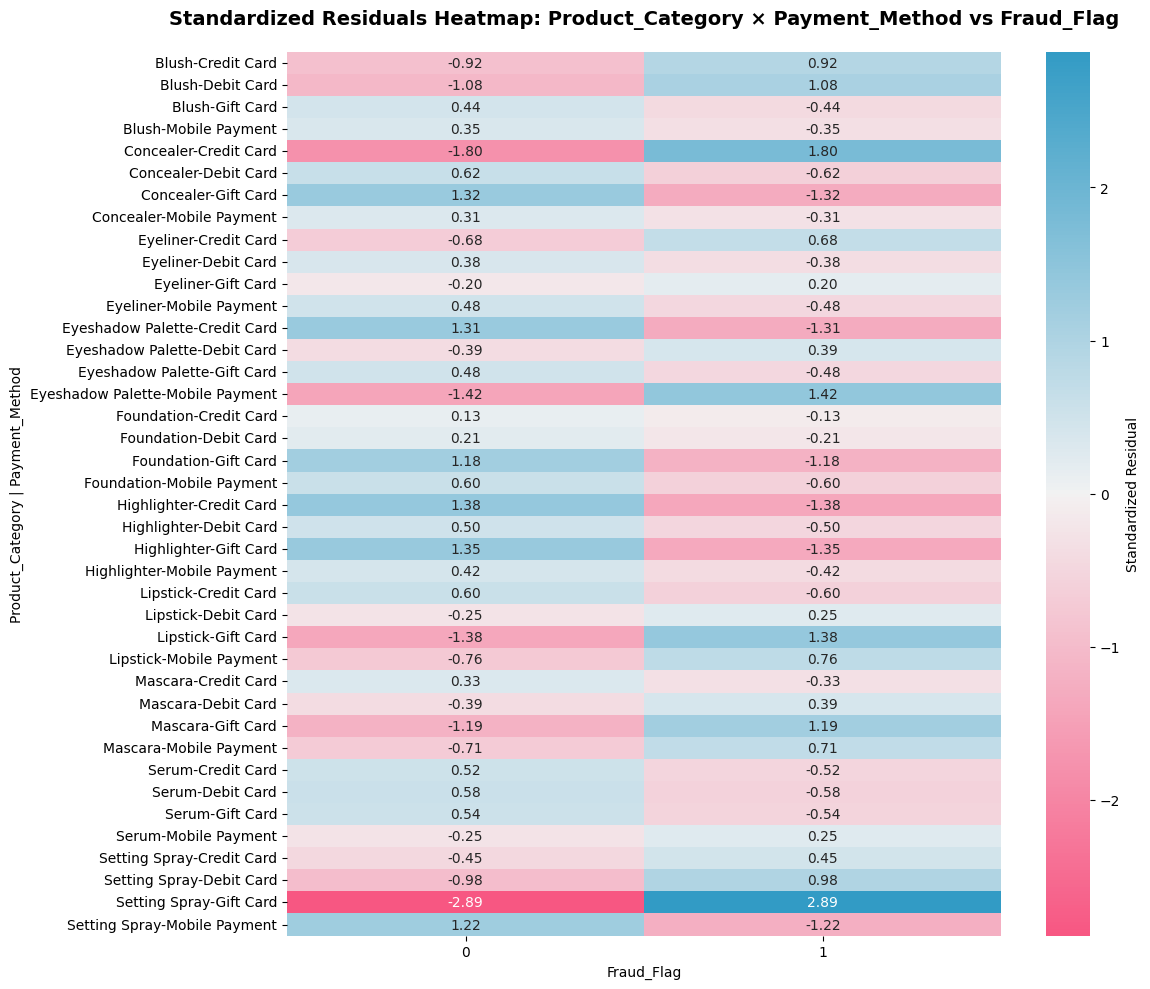

In [40]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency_product_cat_payment.values)
expected_df = pd.DataFrame(expected, index=contingency_product_cat_payment.index, columns=contingency_product_cat_payment.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency_product_cat_payment.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency_product_cat_payment.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency_product_cat_payment.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency_product_cat_payment.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency_product_cat_payment.index,
                            columns=contingency_product_cat_payment.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(12,10))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: Product_Category × Payment_Method vs Fraud_Flag", weight="bold", fontsize=14, pad=20)
plt.ylabel("Product_Category | Payment_Method")
plt.xlabel("Fraud_Flag")
plt.tight_layout()
plt.show()

**Answer**

* **Gift Card + Setting Spray** is the **most prominent risk pattern** → significantly more fraud than expected (Residual 2.89).
* **Concealer + Credit Card** also shows a higher fraud tendency.
* On the other hand, **Lipstick/Highlighter + Gift Card** show less fraud than expected.

#### Which age group spends the most within each **loyalty tier**?

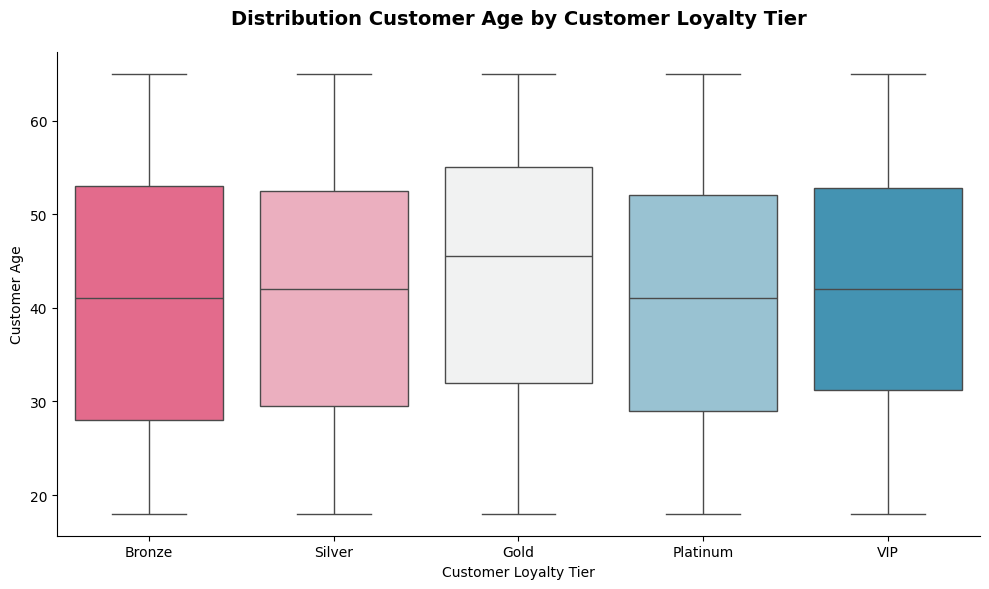

In [41]:
plt.figure(figsize=(10,6))
order_loyalty_tier = ["Bronze", "Silver", "Gold", "Platinum", "VIP"]
sns.boxplot(data=df_fraud_bq, x="Customer_Loyalty_Tier", y="Customer_Age",
            order=order_loyalty_tier, palette=color(n_colors=5))
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution Customer Age by Customer Loyalty Tier", weight="bold", fontsize=14, pad=20)
plt.ylabel("Customer Age")
plt.xlabel("Customer Loyalty Tier")
plt.tight_layout()
plt.show()

**Answer**

* **Gold** customers have the **highest median age** (\~45 years), meaning this tier has a larger proportion of older customers.
* **Bronze, Silver, Platinum, and VIP** all have a median age around \~40–42 years, lower than Gold.

#### Do younger customers (18–30) in lower tiers spend as much as middle-aged customers (40–50) in higher tiers?

In [42]:
# Low tier = Bronze + Silver
low_tier = ["Bronze", "Silver"]

# High tier = Platinum + VIP
high_tier = ["Platinum", "VIP"]

# Young customers (18–30), low tier
young_low = df_fraud[
    (df_fraud["Customer_Age"].between(18, 30)) &
    (df_fraud["Customer_Loyalty_Tier"].isin(low_tier))
]

# Middle-aged customers (40–50), high tier
mid_high = df_fraud[
    (df_fraud["Customer_Age"].between(40, 50)) &
    (df_fraud["Customer_Loyalty_Tier"].isin(high_tier))
]

print("Avg Purchase Amount - Young Low Tier:", young_low["Purchase_Amount"].mean())
print("Avg Purchase Amount - Mid-age High Tier:", mid_high["Purchase_Amount"].mean())

# Mann–Whitney U Test
stat, p = mannwhitneyu(young_low["Purchase_Amount"], mid_high["Purchase_Amount"])
print(f"U-statistic = {stat}, p-value = {p}")

if p < 0.05:
    print("✅ There is a statistically significant difference between the two groups")
else:
    print("❎ There is no statistically significant difference between the two groups")

Avg Purchase Amount - Young Low Tier: 171.65014084507044
Avg Purchase Amount - Mid-age High Tier: 171.13225352112673
U-statistic = 12614.5, p-value = 0.9903114095726987
❎ There is no statistically significant difference between the two groups


#### Which customer groups are more likely to become **loyal customers** (RFM analysis) by tier?

In [43]:
df_fraud = pd.merge(df_fraud, rfm_df[["Customer_ID", "RFM_Segment"]], on="Customer_ID", how="inner")
df_fraud_bq = pd.merge(df_fraud_bq, rfm_df[["Customer_ID", "RFM_Segment"]], on="Customer_ID", how="inner")

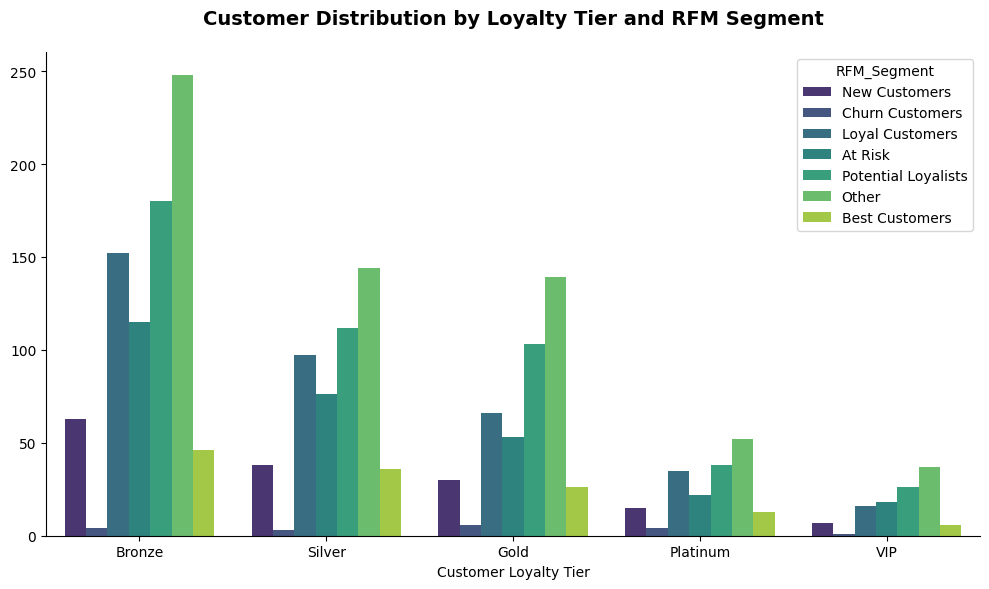

In [44]:
plt.figure(figsize=(10,6))
order_loyalty_tier = ["Bronze", "Silver", "Gold", "Platinum", "VIP"]
sns.countplot(data=df_fraud_bq, x="Customer_Loyalty_Tier",
            order=order_loyalty_tier, palette="viridis", hue="RFM_Segment")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Customer Distribution by Loyalty Tier and RFM Segment", weight="bold", fontsize=14, pad=20)
plt.ylabel("")
plt.xlabel("Customer Loyalty Tier")
plt.tight_layout()
plt.show()

**Answer**

**Bronze Tier**

* This is the largest group.
* Many customers fall into **Potential Loyalists** and **Other**, but there are also significant numbers in **At Risk** and **Churn Customers**.
* Some **Best Customers** exist, but their proportion is relatively low.

>This group has a large customer base but low loyalty → high potential for upsell/cross-sell, yet also more prone to churn.

**Silver Tier**

* Still a sizeable group, but smaller than Bronze.
* Distribution is quite similar to Bronze: many **Potential Loyalists** and **Other**, with a smaller share of **Best Customers**.
* A noticeable portion of **At Risk** customers.

>This group is in the middle stage: they can be upgraded into **Loyal/Best Customers** if nurtured properly.

**Gold Tier**

* Fewer customers compared to Bronze/Silver.
* However, the share of **Loyal Customers** and **Potential Loyalists** is higher.
* The proportion of **Best Customers** is higher than in Silver.

>This is a **high-quality group**: smaller in size but higher in value.

**Platinum Tier**

* Smaller group, but:

  * A balanced mix of **Loyal**, **Potential Loyalists**, and **Other**.
  * Presence of **Best Customers**, though not many.
* A few **Churn Customers**, but not significant.

>This group consists of long-term loyal customers, even though the absolute count is low.

**VIP Tier**

* The smallest in terms of customer count.
* Majority fall into **Potential Loyalists** and **Other**.
* A distinct group of **Best Customers**, small in number but high in value.

>This tier is very important for revenue (high CLV), requiring special retention and personalized service.

**Overall Conclusion**

* **Bronze & Silver** → large customer base but relatively low quality, requiring nurturing strategies for retention.
* **Gold** → fewer customers but higher proportions of Loyal and Best Customers → a valuable group.
* **Platinum & VIP** → small in size, but consist of **high-value customers (high CLV)** that need premium retention strategies.

#### How does the ratio of “Best Customers” vs. “At Risk” customers distribute across Bronze, Silver, Gold, and Platinum tiers?

**Answer**

* **Bronze & Silver** → The number of **At Risk** customers is **much higher** than **Best Customers**.
* **Gold** → The ratio is **more balanced**, with Best Customers appearing more strongly.
* **Platinum** → Although total counts are smaller, the ratio of **Best Customers vs. At Risk** is **closer** compared to Bronze/Silver.

👉 In short: **Bronze/Silver skew toward At Risk**, while **Gold/Platinum show a healthier balance with more Best Customers.**

#### Which stores have **high foot traffic but low revenue** (low conversion rate)?

               Store_ID  Avg_Footfall  Total_Purchase  Avg_Purchase
0        BOUTIQUE-DUBAI    273.416244        35685.94    181.146904
1          BOUTIQUE-NYC    277.102326        37779.53    175.718744
2     BOUTIQUE-SHANGHAI    265.248848        35944.72    165.643871
3     CONCESSION-LONDON    273.823232        34925.23    176.390051
4  CONCESSION-SINGAPORE    283.730570        36074.10    186.912435
5           FLAGSHIP-LA    273.400901        38779.93    174.684369
6        FLAGSHIP-PARIS    263.371795        39808.58    170.122137
7         FLAGSHIP-ROME    273.259740        41054.55    177.725325
8           POPUP-MILAN    267.778281        38597.99    174.651538
9           POPUP-TOKYO    275.897561        33801.25    164.884146


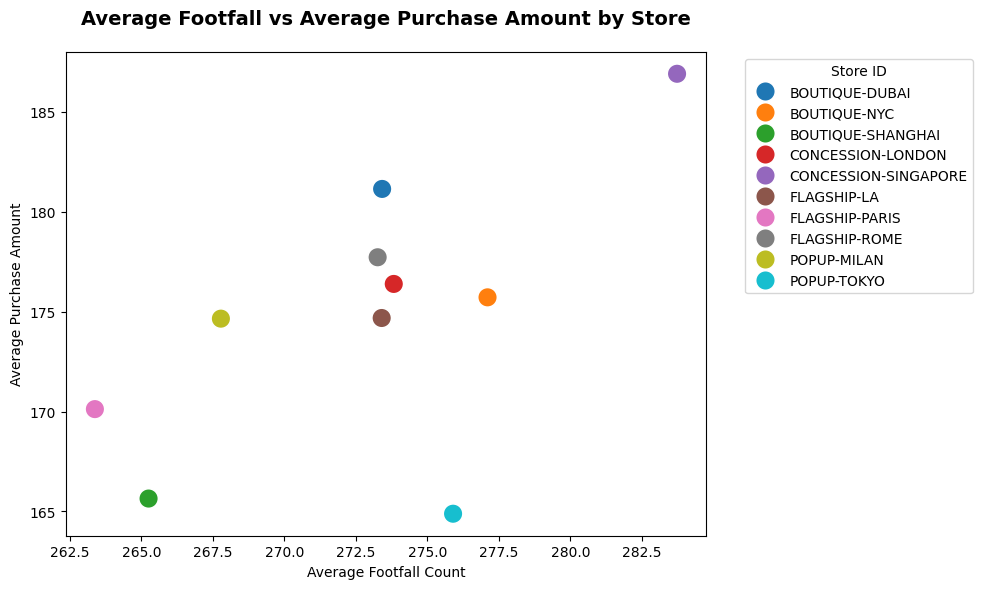

In [45]:
# Aggregate by Store
store_summary = df_fraud.groupby("Store_ID").agg(
    Avg_Footfall=("Footfall_Count", "mean"),
    Total_Purchase=("Purchase_Amount", "sum"),
    Avg_Purchase=("Purchase_Amount", "mean")
).reset_index()

print(store_summary)

# Scatter plot aggregated
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=store_summary,
    x="Avg_Footfall",
    y="Avg_Purchase",
    hue="Store_ID",
    s=200
)
plt.title("Average Footfall vs Average Purchase Amount by Store", weight="bold", fontsize=14, pad=20)
plt.xlabel("Average Footfall Count")
plt.ylabel("Average Purchase Amount")
plt.legend(title="Store ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Answer**

* **CONCESSION-SINGAPORE** → stands out the most: **highest footfall (\~283)** and **highest average purchase (\~187)** → store is highly efficient.
* **POPUP-TOKYO** → has **relatively high footfall (\~275)** but **the lowest average purchase (\~165)** → sign of a **weak conversion rate**.
* **BOUTIQUE-SHANGHAI** and **FLAGSHIP-PARIS** → both show **low footfall (\~263–265)** and **low purchases (\~166–170)** → underperforming in both.
* The other stores (Dubai, NYC, London, LA, Rome, Milan) fall somewhere in the middle → fairly balanced, neither outstanding nor poor.

Therefore, from the chart:

* If we ask **which store has high footfall but low purchase** → the most notable case is **POPUP-TOKYO**.
* If we ask **which store has both high footfall and high purchase** → that’s **CONCESSION-SINGAPORE**.

#### Are there stores with **low footfall but high revenue per customer** (premium locations)?

**Answer**

* **Low footfall, high purchase amount (premium signals):**

  * **BOUTIQUE-DUBAI**: average footfall isn’t very high, but purchase amount is among the highest (\~181). This is a real “premium” candidate.

* **High footfall & high purchase amount:**

  * **CONCESSION-SINGAPORE** stands out: attracts the most customers (\~283) and also has the highest purchase amount (\~187). This is an “all-round performer.”

* **Low footfall & low purchase amount (underperforming):**

  * **FLAGSHIP-PARIS (\~170)** and **BOUTIQUE-SHANGHAI (\~166)** → fewer customers and lower spending.

* The remaining stores (**NYC, London, Rome, LA, Milan, Tokyo**) sit around the average range, without strong deviations.

**Summary:**

* **Premium store candidate:** BOUTIQUE-DUBAI
* **Top performer:** CONCESSION-SINGAPORE
* **Underperformers:** FLAGSHIP-PARIS, BOUTIQUE-SHANGHAI

#### Do customers using **Mobile Payment on Mobile** spend more on average compared to **Credit Card on Desktop**?

In [46]:
df_mobile = df_fraud_bq[(df_fraud_bq["Device_Type"] == "Mobile") & 
                        (df_fraud_bq["Payment_Method"] == "Mobile Payment")]


df_desktop_CC = df_fraud_bq[(df_fraud_bq["Device_Type"] == "Desktop") & 
                        (df_fraud_bq["Payment_Method"] == "Credit Card")]

print("Avg Purchase Amount - Mobile payment on Mobile:", df_mobile["Purchase_Amount"].mean())
print("Avg Purchase Amount - Credit Card on Desktop:", df_desktop_CC["Purchase_Amount"].mean())

Avg Purchase Amount - Mobile payment on Mobile: 169.138203125
Avg Purchase Amount - Credit Card on Desktop: 173.03795454545457


**Answer**

**Customers using Credit Card on Desktop spend slightly more on average (173.0) compared to those using Mobile Payment on Mobile (169.1).**

#### What times of day (“golden hours”) see the highest customer concentration in each store?

,Store_ID,Hour,Transactions,Footfall,Load
0,BOUTIQUE-DUBAI,23,11,3532,3532
1,BOUTIQUE-NYC,7,18,5146,5146
2,BOUTIQUE-SHANGHAI,15,14,4238,4238
3,CONCESSION-LONDON,23,12,3892,3892
4,CONCESSION-SINGAPORE,21,14,4851,4851


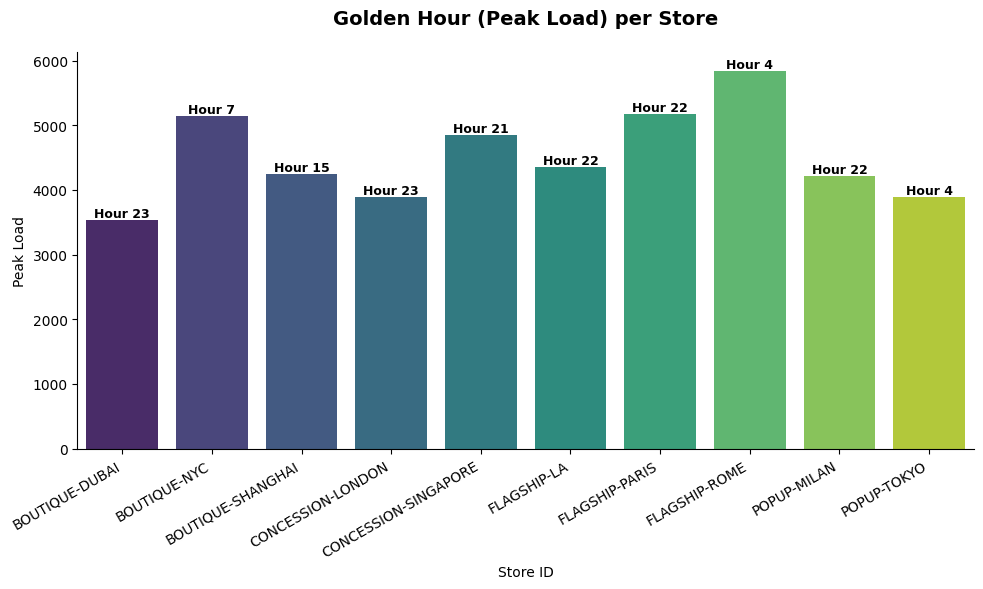

In [47]:
# Create Hour of Day Feature
df_fraud_bq["Hour"] = df_fraud_bq["Transaction_Timestamp"].dt.hour

# Aggregate by Hour & Store
store_hourly = (
    df_fraud_bq.groupby(["Store_ID", "Hour"], as_index=False)
    .agg(
        Transactions=("Transaction_ID", "nunique"),
        Footfall=("Footfall_Count", "sum")
    )
)

# Prefer Footfall; fallback to Transactions if Footfall is 0/NaN
store_hourly["Load"] = np.where(
    store_hourly["Footfall"].fillna(0) > 0,
    store_hourly["Footfall"].fillna(0),
    store_hourly["Transactions"].fillna(0)
)

# Identify “Golden Hour” for Each Store (based on Load)
golden_hours = store_hourly.loc[
    store_hourly.groupby("Store_ID")["Load"].idxmax()
].reset_index(drop=True)

display(golden_hours.head())

# --- Plot 1: Golden hour per store (bar chart + annotated hour) ---
plt.figure(figsize=(10,6))
ax = sns.barplot(data=golden_hours, x="Store_ID", y="Load", palette="viridis")
for i, r in enumerate(golden_hours.itertuples(index=False)):
    ax.text(i, r.Load, f"Hour {int(r.Hour)}", ha="center", va="bottom", fontsize=9, weight="bold")
plt.title("Golden Hour (Peak Load) per Store", weight="bold", fontsize=14, pad=20)
plt.xlabel("Store ID"); plt.ylabel("Peak Load")
plt.xticks(rotation=30, ha="right")
sns.despine()
plt.tight_layout()
plt.show()

**Answer**

* **Late-night hours (9–11 PM)**: most common (Dubai, London, Singapore, LA, Paris, Milan) → strong preference for after-work shopping.
* **Early-morning hours (4–7 AM)**: seen in Rome, Tokyo, and NYC → may reflect time-zone effects, travel hubs, or event-driven behavior.
* **Afternoon hours (3 PM)**: observed in Shanghai → customers prefer mid-day shopping.

#### How many **High CLV** customers are flagged as fraudulent?

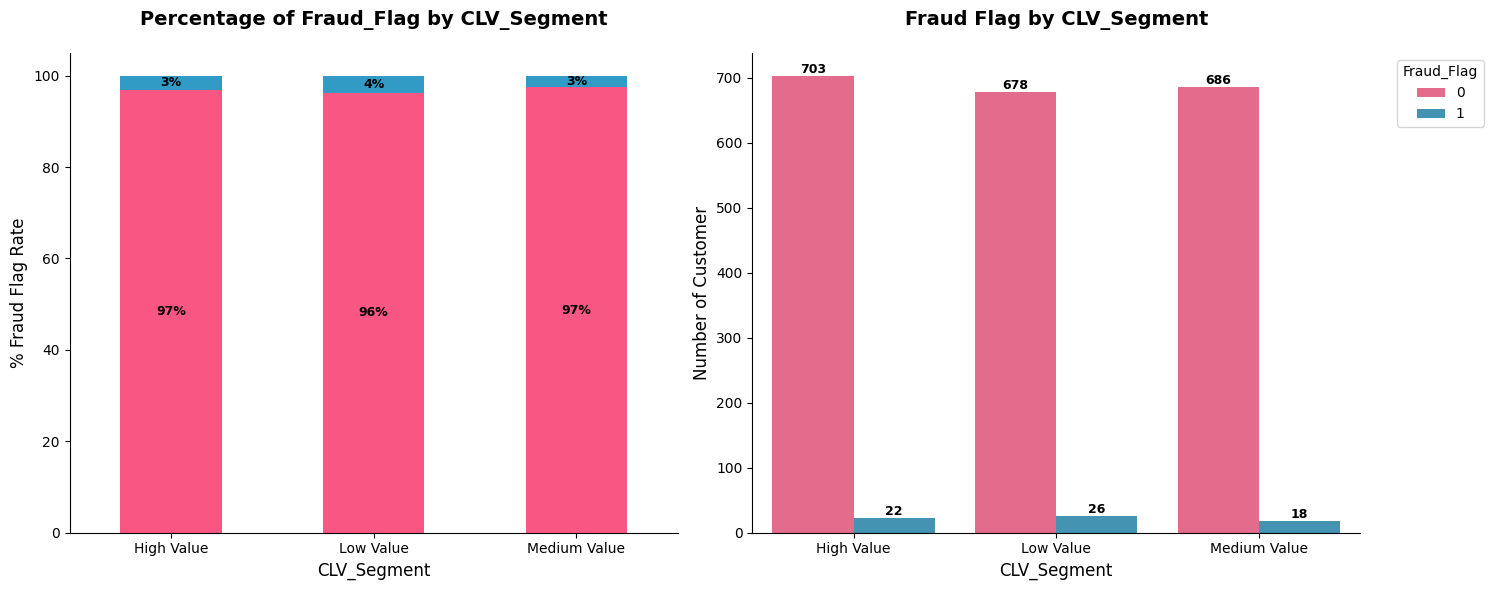


🔍 Chi-Square Test of Independence: 'CLV_Segment' vs. 'Fraud_Flag'
Chi-squared statistic: 1.529
Degrees of freedom: 2
p-value: 0.465569
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'CLV_Segment' and 'Fraud_Flag'.

Standardized Residuals:
Fraud_Flag       0     1
CLV_Segment             
High Value    0.02 -0.09
Low Value    -0.16  0.90
Medium Value  0.14 -0.81


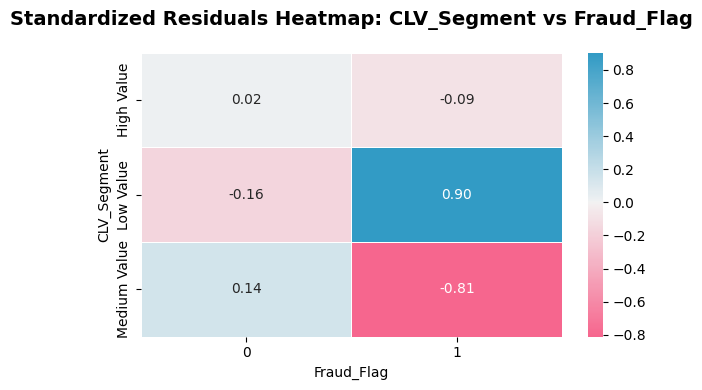

In [48]:
df_fraud = pd.merge(df_fraud, clv_df[["Customer_ID", "CLV_Segment"]], on="Customer_ID", how="inner")
df_fraud_bq = pd.merge(df_fraud_bq, clv_df[["Customer_ID", "CLV_Segment"]], on="Customer_ID", how="inner")

bivariate_percent_plot(cat="CLV_Segment", df=df_fraud_bq)

**Answer**

There is no statistically significant difference across CLV Segments, but the Low Value group shows a slightly higher fraud rate.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Handling Missing Value

In [49]:
print("Missing value dataset: ")
displayNULL(df_fraud, dataset_name="Dataset")

Missing value dataset: 
🔎 Missing Value Summary for: Dataset
+-----------------------+---------------+-----------+
| Feature               | Missing_Count | Missing_% |
+-----------------------+---------------+-----------+
| Customer_Age          | 106           | 4.97      |
| Customer_Loyalty_Tier | 106           | 4.97      |
| Payment_Method        | 106           | 4.97      |
+-----------------------+---------------+-----------+

⚠️  Total missing values: 318 out of 2,133 rows.


In [50]:
df_fraud["Customer_Loyalty_Tier"] = (
    df_fraud["Customer_Loyalty_Tier"].astype("string").fillna("Unknown").astype("category")
)
df_fraud["Payment_Method"] = (
    df_fraud["Payment_Method"].astype("string").fillna("Unknown").astype("category")
)
df_fraud["Customer_Age"] = df_fraud["Customer_Age"].fillna(df_fraud["Customer_Age"].median())

print("Missing value dataset: ")
displayNULL(df_fraud, dataset_name="Dataset")

Missing value dataset: 
🔎 Missing Value Summary for: Dataset
✅ No missing values detected in 2,133 rows.


## Feature Engineering

In [51]:
# VIP_Platinum_CC_Flag
df_fraud = pd.merge(df_fraud, df_fraud_bq[["Customer_ID", "VIP_Platinum_CC_Flag"]], on="Customer_ID", how="inner")

df_fraud.drop(columns="Transaction_Timestamp", axis=1, inplace=True)
df_fraud.drop(columns="Transaction_ID", axis=1, inplace=True)
df_fraud.drop(columns="Customer_ID", axis=1, inplace=True)

list_features = ["quarter", "RFM_Segment", "CLV_Segment", "VIP_Platinum_CC_Flag"]
convert_cat(features=list_features, df=df_fraud)

df_fraud["Fraud_Flag"] = df_fraud["Fraud_Flag"].astype("int8")
df_fraud["Customer_Age"] = df_fraud["Customer_Age"].astype("int8")
df_fraud["Footfall_Count"] = df_fraud["Footfall_Count"].astype("int16")

df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Customer_Age           2133 non-null   int8    
 1   Customer_Loyalty_Tier  2133 non-null   category
 2   Store_ID               2133 non-null   category
 3   Product_SKU            2133 non-null   category
 4   Product_Category       2133 non-null   category
 5   Purchase_Amount        2133 non-null   float64 
 6   Payment_Method         2133 non-null   category
 7   Device_Type            2133 non-null   category
 8   Fraud_Flag             2133 non-null   int8    
 9   Footfall_Count         2133 non-null   int16   
 10  Country                2133 non-null   category
 11  quarter                2133 non-null   category
 12  RFM_Segment            2133 non-null   category
 13  CLV_Segment            2133 non-null   category
 14  VIP_Platinum_CC_Flag   2133 non-null   c

## Re-checking Skew

In [52]:
skew_feature, skew_df = check_skewness(data=df_fraud, numerical_features=num_features)


🔍 Skewness for dataset:
---------------------------------------------------------------------------
Feature                             | Skewness   | Remark
---------------------------------------------------------------------------
Customer_Age                        |  -0.060073 | Approximately symmetric
Footfall_Count                      |  +0.037481 | Approximately symmetric
Purchase_Amount                     |  -0.009066 | Approximately symmetric
---------------------------------------------------------------------------


## Re-check Outliers

In [53]:
checking_outlier(list_feature=num_features, df=df_fraud, dataset_name="Data")

🔍 Data Checking outlier
✅ No outliers detected in the selected features.


## Create Test Set

🔴 Suppose you chatted with experts who told you that the **Study_Hours_Per_Day** is a very important attribute to predict **VIP_Platinum_CC_Flag**. <br>

In [54]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_fraud, df_fraud["VIP_Platinum_CC_Flag"]):
    start_train_set = df_fraud.loc[train_index]
    start_test_set = df_fraud.loc[test_index]

## Scale and Encode

In [55]:
df_fraud_new = start_train_set.drop("Fraud_Flag", axis=1)
df_fraud_label = start_train_set["Fraud_Flag"].copy()

In [56]:
cat_features = ["Customer_Loyalty_Tier", "Store_ID", "Product_SKU", "Product_Category",
                "Payment_Method", "Device_Type", "Country", "quarter", "RFM_Segment",
                "CLV_Segment", "VIP_Platinum_CC_Flag"]

# There are no **missing values** into dataset. But we will still handle missing values ​​to check the data in the future.
num_transfomer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_transfomer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transfomer, num_features),
        ("cat", cat_transfomer, cat_features),
    ]
)

preprocessor.fit(df_fraud_new)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Customer_Age', 'Purchase_Amount',
                                  'Footfall_Count']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Customer_Loyalty_Tier', 'Store_ID',
                                  'Product_SKU', 'Product_Category',
                                  'Payment_Method', 'Device_Type', 'Country',
                                  'quarter', 'RFM_Segment', 'CLV_Segment',
                                  'VIP_Platinum_CC_Flag'])])

In [57]:
df_fraud_new_prepared = preprocessor.transform(df_fraud_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num__Customer_Age',
 'num__Purchase_Amount',
 'num__Footfall_Count',
 'cat__Customer_Loyalty_Tier_Bronze',
 'cat__Customer_Loyalty_Tier_Gold',
 'cat__Customer_Loyalty_Tier_Platinum',
 'cat__Customer_Loyalty_Tier_Silver',
 'cat__Customer_Loyalty_Tier_Unknown',
 'cat__Customer_Loyalty_Tier_VIP',
 'cat__Store_ID_BOUTIQUE-DUBAI',
 'cat__Store_ID_BOUTIQUE-NYC',
 'cat__Store_ID_BOUTIQUE-SHANGHAI',
 'cat__Store_ID_CONCESSION-LONDON',
 'cat__Store_ID_CONCESSION-SINGAPORE',
 'cat__Store_ID_FLAGSHIP-LA',
 'cat__Store_ID_FLAGSHIP-PARIS',
 'cat__Store_ID_FLAGSHIP-ROME',
 'cat__Store_ID_POPUP-MILAN',
 'cat__Store_ID_POPUP-TOKYO',
 'cat__Product_SKU_AURORA-LIP-01',
 'cat__Product_SKU_CELESTE-EYE-05',
 'cat__Product_SKU_COSMIC-HIGHLIGHT-06',
 'cat__Product_SKU_ECLIPSE-EYE-10',
 'cat__Product_SKU_GALAXIA-SET-08',
 'cat__Product_SKU_LUNAR-MASC-02',
 'cat__Product_SKU_NEBULA-SERUM-07',
 'cat__Product_SKU_ORION-CONCEAL-09',
 'cat__Product_SKU_SOLAR-BLUSH-04',
 'cat__Product_SKU_STELLAR-FOUND-03',
 'cat

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [58]:
class_1 = df_fraud_label.sum()
class_0 = len(df_fraud_label) - class_1
scale_pos_weight = class_0 / class_1

In [59]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, 
                              AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=seed, class_weight="balanced"),    
    SVC(kernel="rbf", random_state=seed, class_weight="balanced"),
    KNeighborsClassifier(metric="minkowski", p=2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed, class_weight="balanced"),
    DecisionTreeClassifier(max_depth=5, random_state=seed, class_weight="balanced"),
    RandomForestClassifier(n_estimators=100, random_state=seed, class_weight="balanced"),
    ExtraTreesClassifier(random_state=seed, class_weight="balanced"),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(
        n_estimators=2000, max_depth=4, eval_metric="logloss", random_state=seed,
        min_child_weight=2, gamma=0.9, subsample=0.8, colsample_bytree=0.8,
        objective="binary:logistic", nthread=-1, scale_pos_weight=scale_pos_weight 
    ),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter, class_weight="balanced"),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold, class_weight="balanced"),
    CatBoostClassifier(verbose=0, random_seed=seed, auto_class_weights="Balanced"),
    BaggingClassifier(random_state=seed),
    HistGradientBoostingClassifier(random_state=seed, class_weight="balanced", max_iter=max_iter)
]

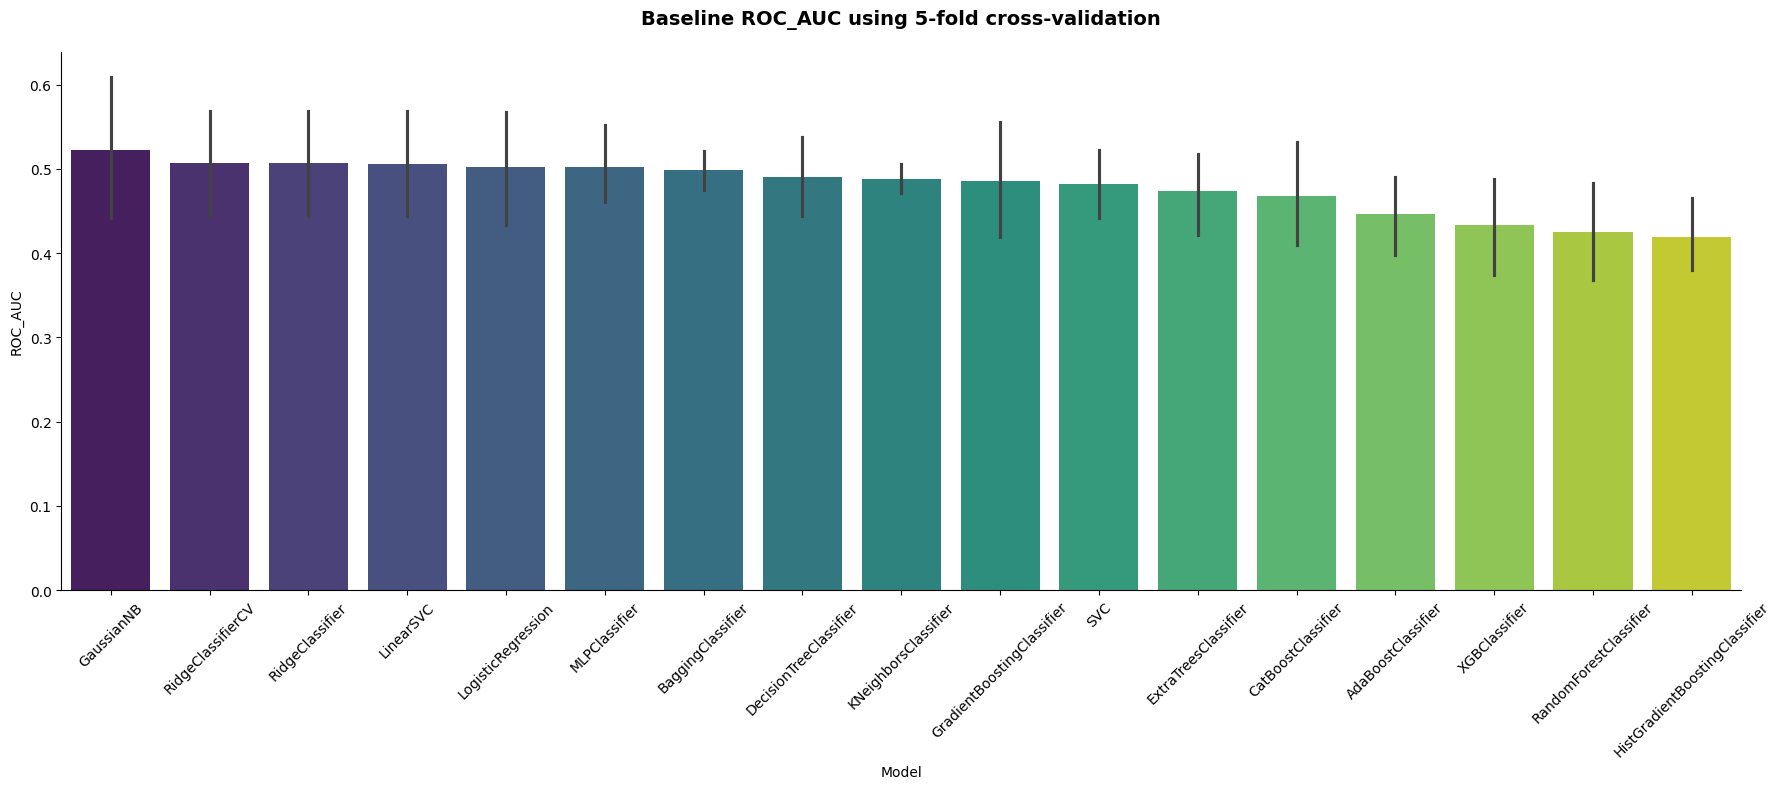

,Mean,Std,N
model_name,,,
GaussianNB,0.522624,0.108318,5
RidgeClassifierCV,0.506707,0.078550,5
RidgeClassifier,0.506432,0.078838,5
LinearSVC,0.506269,0.080022,5
LogisticRegression,0.501641,0.082600,5
MLPClassifier,0.501630,0.060130,5
BaggingClassifier,0.498475,0.027745,5
DecisionTreeClassifier,0.490577,0.060239,5
KNeighborsClassifier,0.488343,0.022622,5


In [60]:
def generate_baseline_results(models=models, X=df_fraud_new_prepared, y=df_fraud_label,
                              metric="roc_auc", cv=kfold, plot_result=False):
    
    X_ = X.toarray() if hasattr(X, "toarray") else X
    entries = []
    for model in models:
        model_name = getattr(model, "name", model.__class__.__name__)
        scores = cross_val_score(model, X_, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, s in enumerate(scores, start=1):
            entries.append((model_name, fold_idx, s))

    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "score"])

    summary = (cv_df.groupby("model_name")["score"]
                    .agg(Mean="mean", Std="std", N="size")
                    .sort_values("Mean", ascending=False))

    if plot_result:
        order = summary.index.tolist()
        plt.figure(figsize=(18, 8))
        sns.barplot(data=cv_df, x="model_name", y="score", order=order, palette="viridis")
        sns.despine()
        title_metric = metric.upper() if isinstance(metric, str) else "Score"
        nfolds = getattr(cv, "n_splits", "CV")
        plt.title(f"Baseline {title_metric} using {nfolds}-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model"); plt.ylabel(title_metric)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return summary

generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

## Class Imbalance Handling

- The dataset has ~97% 'Legitimate' in the target, so models may be biased toward the majority class.
- To mitigate this, we explicitly calculate a **`scale_pos_weight`** to emphasize the minority class (Introverts) during training:

**Breakdown of Class Imbalance Calculation**

| Line                                   | What It Does     | Why It's Useful                      |
| -------------------------------------- | ---------------- | ------------------------------------ |
| `class_1 = df_train_label_new.sum()`                    | Count of class 1 | Needed for imbalance calculation     |
| `class_0 = len(df_train_label_new) - class_1`           | Count of class 0 | Complement of class 1                |
| `scale_pos_weight = class_0 / class_1` | Weight factor    | Penalizes minority class errors more |

**Class Imbalance Strategies by Model**

- We instantiate five high-performance gradient boosting models, each tuned using Optuna and configured to handle class imbalance natively.

| Model                            | Class Imbalance Handling                   |
| -------------------------------- | ------------------------------------------ |
| `CatBoostClassifier`             | `class_weights={1: scale_pos_weight}`       |
| `XGBClassifier`           | `scale_pos_weight=scale_pos_weight`        |
| `HistGradientBoostingClassifier` | `class_weight="balanced"`                  |
| `RandomForestClassifier` | `class_weight="balanced"`                  |

- These configurations ensure that each model gives proportional attention to both personality classes.

In [61]:
def shap_plot(model, X_test, list_feature, type = None):
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance", fontsize=14, weight="bold", pad=20)
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [62]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)

    # Plot 1
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve", fontsize=14, weight="bold", pad=20)
    ax[1, 0].legend()

    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))
    return rocScore

In [63]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    rocScore = plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)
    return rocScore

In [64]:
X_val = start_test_set.drop("Fraud_Flag", axis=1)
y_val = start_test_set["Fraud_Flag"].copy()
X_val_prepared = preprocessor.transform(X_val)

## RandomForestClassifier

In [65]:
param_rf = {
"n_estimators": 307,
"criterion": "log_loss",
"max_depth": 10,
"min_samples_split": 3,
"min_samples_leaf": 1,
"max_features": 0.3,
"bootstrap": True,
"max_samples": 0.5744331540228137,
"class_weight": "balanced",
"random_state": seed
}

model_rf = RandomForestClassifier(**param_rf)
model_rf

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, max_features=0.3,
                       max_samples=0.5744331540228137, min_samples_split=3,
                       n_estimators=307, random_state=42)

Evaluating RandomForestClassifier...


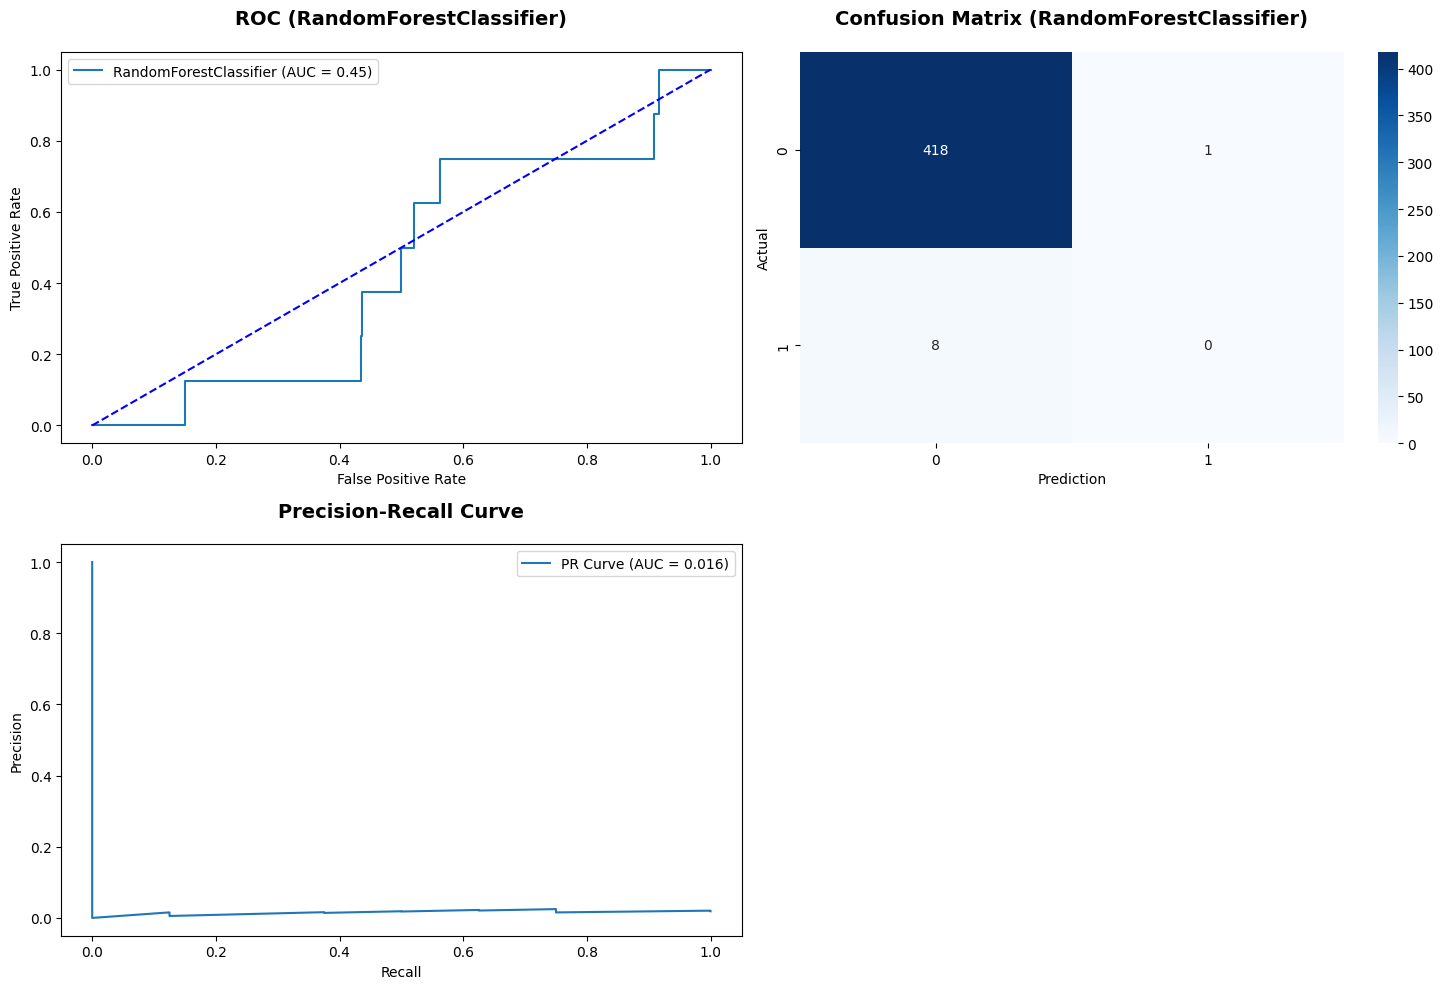

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       419
           1       0.00      0.00      0.00         8

    accuracy                           0.98       427
   macro avg       0.49      0.50      0.49       427
weighted avg       0.96      0.98      0.97       427



In [66]:
rocScore_rf = evaluate_model(model = model_rf, X_train=df_fraud_new_prepared, X_val=X_val_prepared,
                               y_train=df_fraud_label, y_val=y_val, figsize=(15, 10))

## HistGradientBoostingClassifier

In [79]:
param_hgb = {
"learning_rate": 0.044545799416056284,
"max_iter": 252,
"max_depth": 3,
"max_leaf_nodes": 149,
"min_samples_leaf": 100,
"l2_regularization": 3.9271148379019006e-07,
"max_bins": 210,
"early_stopping": False,
"validation_fraction": 0.2291171510380235,
"n_iter_no_change": 28,
"tol": 6.148832581844286e-06,
"random_state": seed,
"class_weight": "balanced",
"scoring": "roc_auc"
}

model_hgb = HistGradientBoostingClassifier(**param_hgb)
model_hgb

HistGradientBoostingClassifier(class_weight='balanced', early_stopping=False,
                               l2_regularization=3.9271148379019006e-07,
                               learning_rate=0.044545799416056284, max_bins=210,
                               max_depth=3, max_iter=252, max_leaf_nodes=149,
                               min_samples_leaf=100, n_iter_no_change=28,
                               random_state=42, scoring='roc_auc',
                               tol=6.148832581844286e-06,
                               validation_fraction=0.2291171510380235)

Evaluating HistGradientBoostingClassifier...


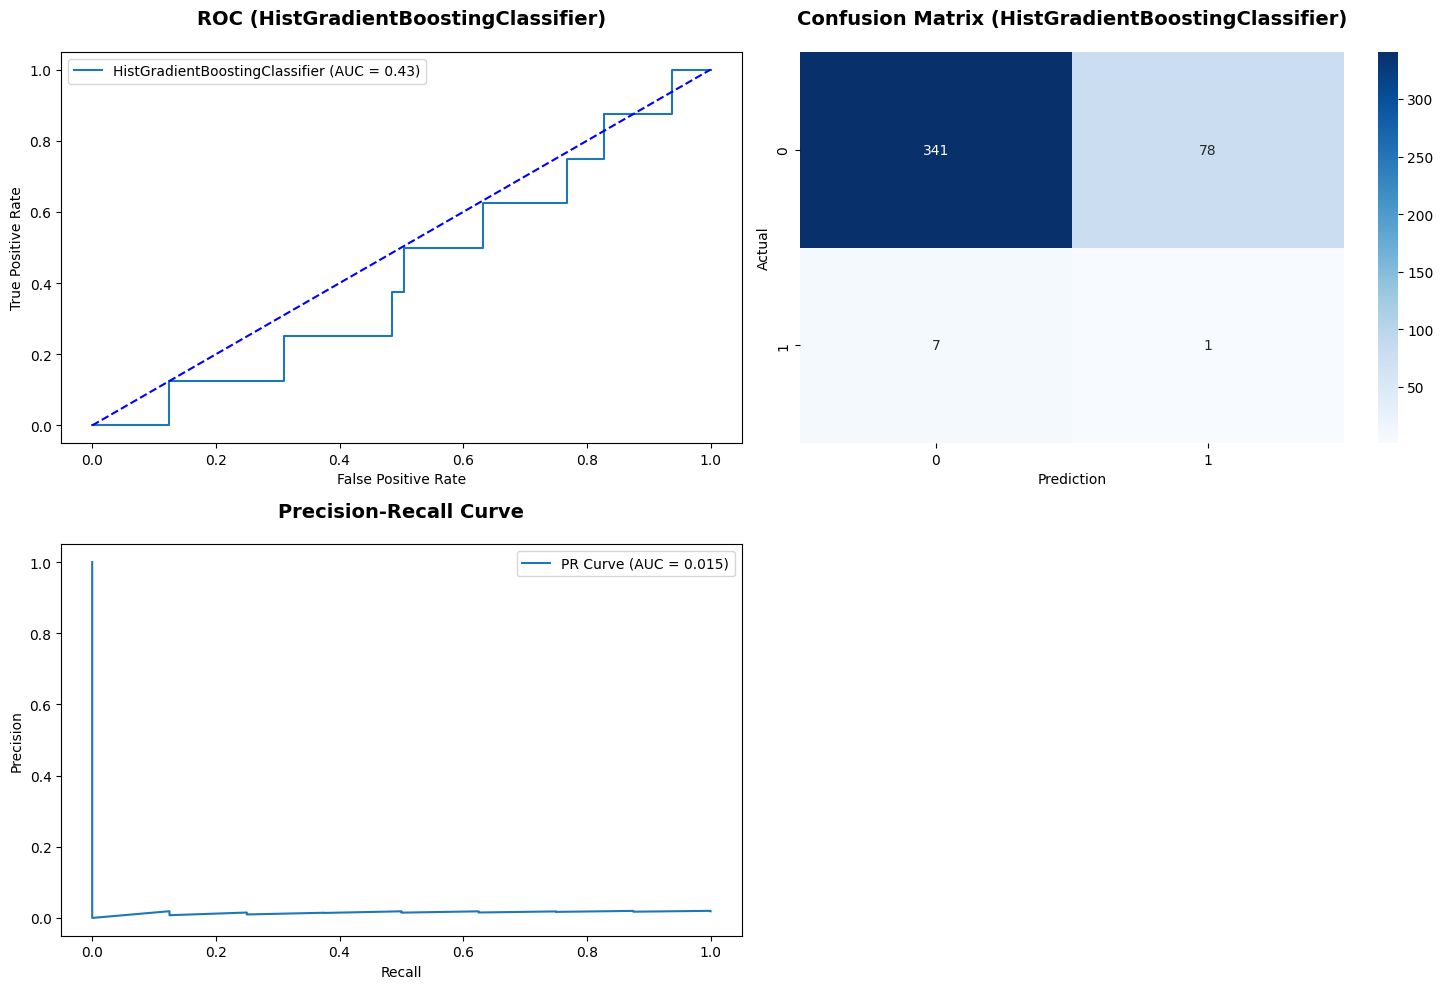

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       419
           1       0.01      0.12      0.02         8

    accuracy                           0.80       427
   macro avg       0.50      0.47      0.46       427
weighted avg       0.96      0.80      0.87       427



In [80]:
X_hgb = df_fraud_new_prepared.toarray() if hasattr(df_fraud_new_prepared, "toarray") else df_fraud_new_prepared
X_val_prepared = X_val_prepared.toarray() if hasattr(X_val_prepared, "toarray") else X_val_prepared
rocScore_hgb = evaluate_model(model = model_hgb, X_train=X_hgb, X_val=X_val_prepared,
                               y_train=df_fraud_label, y_val=y_val, figsize=(15, 10))

## CatBoostClassifier

In [69]:
param_cb = {
"bootstrap_type": "Bayesian",
"iterations": 1134,
"learning_rate": 0.2038246579660342,
"depth": 8,
"l2_leaf_reg": 0.0013086175779392386,
"random_strength": 0.7217260483254573,
"border_count": 76,
"leaf_estimation_iterations": 6,
"bagging_temperature": 5.509428909578156,
"class_weights": [1, scale_pos_weight],
"loss_function": "Logloss",
"eval_metric": "AUC",
"random_state": seed,
"verbose": 0
}

model_cb = CatBoostClassifier(**param_cb)
model_cb

Evaluating CatBoostClassifier...


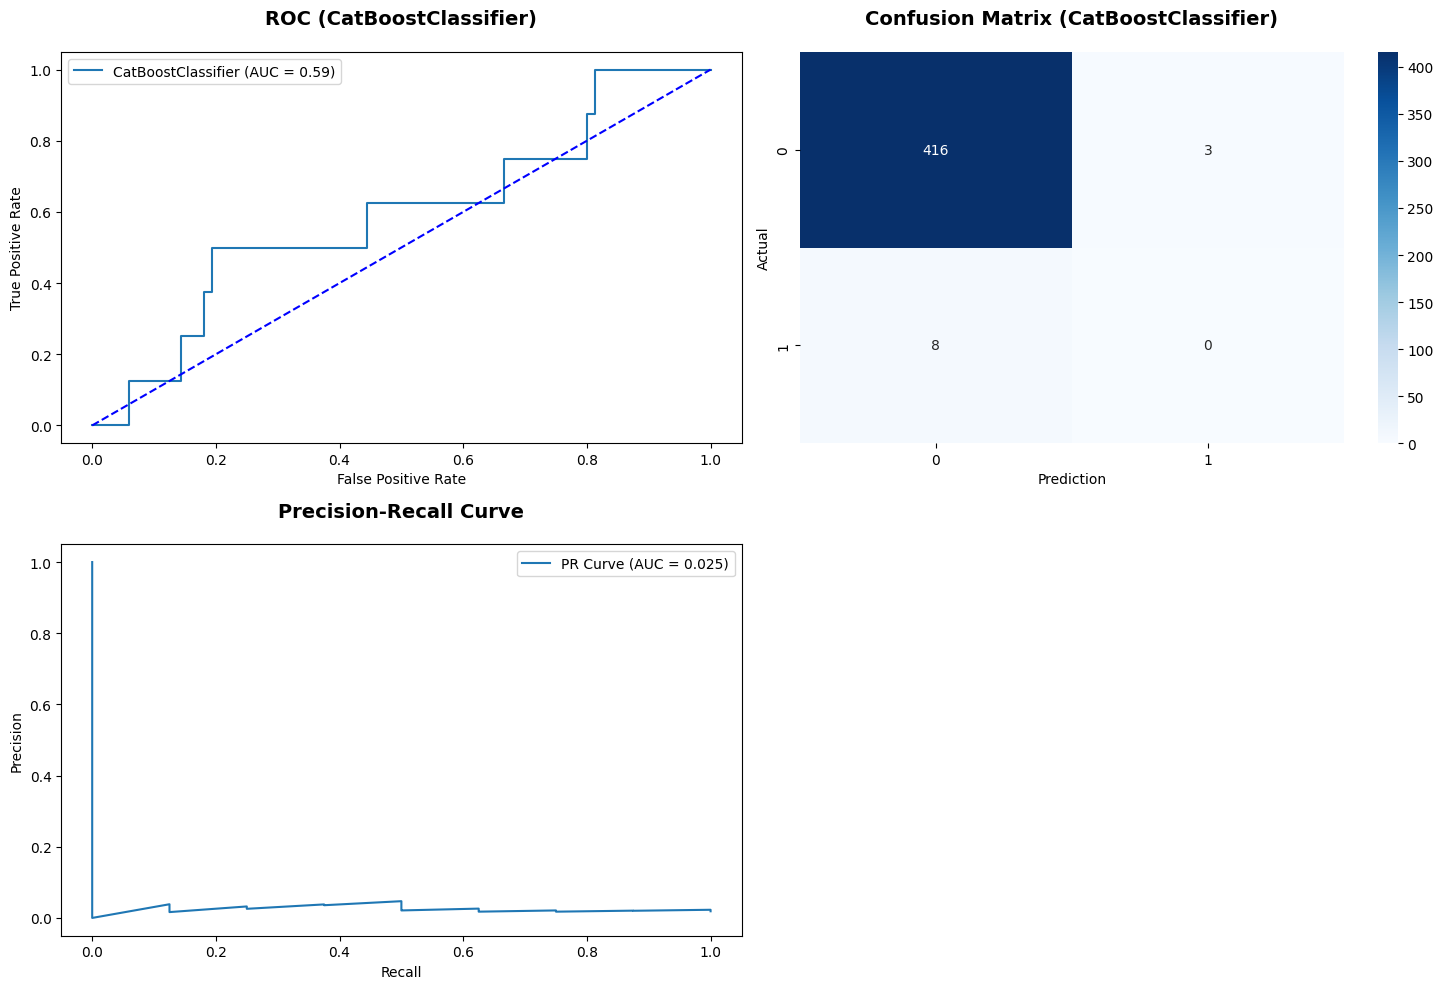

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.00      0.00      0.00         8

    accuracy                           0.97       427
   macro avg       0.49      0.50      0.49       427
weighted avg       0.96      0.97      0.97       427



In [70]:
X_cat = df_fraud_new_prepared.toarray() if hasattr(df_fraud_new_prepared, "toarray") else df_fraud_new_prepared
X_val_prepared = X_val_prepared.toarray() if hasattr(X_val_prepared, "toarray") else X_val_prepared
rocScore_cb = evaluate_model(model = model_cb, X_train=X_cat, X_val=X_val_prepared,
                               y_train=df_fraud_label, y_val=y_val, figsize=(15, 10))

## XGBClassifier

In [71]:
param_xgb = {
"n_estimators": 611,
"learning_rate": 0.020364564980695506,
"max_depth": 3,
"min_child_weight": 5.703355380336091,
"gamma": 5.4730073211590815,
"subsample": 0.5302360085854332,
"colsample_bytree": 0.9110803384354336,
"reg_alpha": 2.208164286373561e-05,
"reg_lambda": 8.977380896698395e-07,
"max_bin": 316,
"eval_metric": "auc",
"random_state": seed,
"n_jobs": -1,
"verbosity": 0
}

model_xgb = XGBClassifier(**param_xgb)
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9110803384354336, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=5.4730073211590815, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.020364564980695506,
              max_bin=316, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5.703355380336091, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=611,
              n_jobs=-1, num_parallel_tree=None, ...)

Evaluating XGBClassifier...


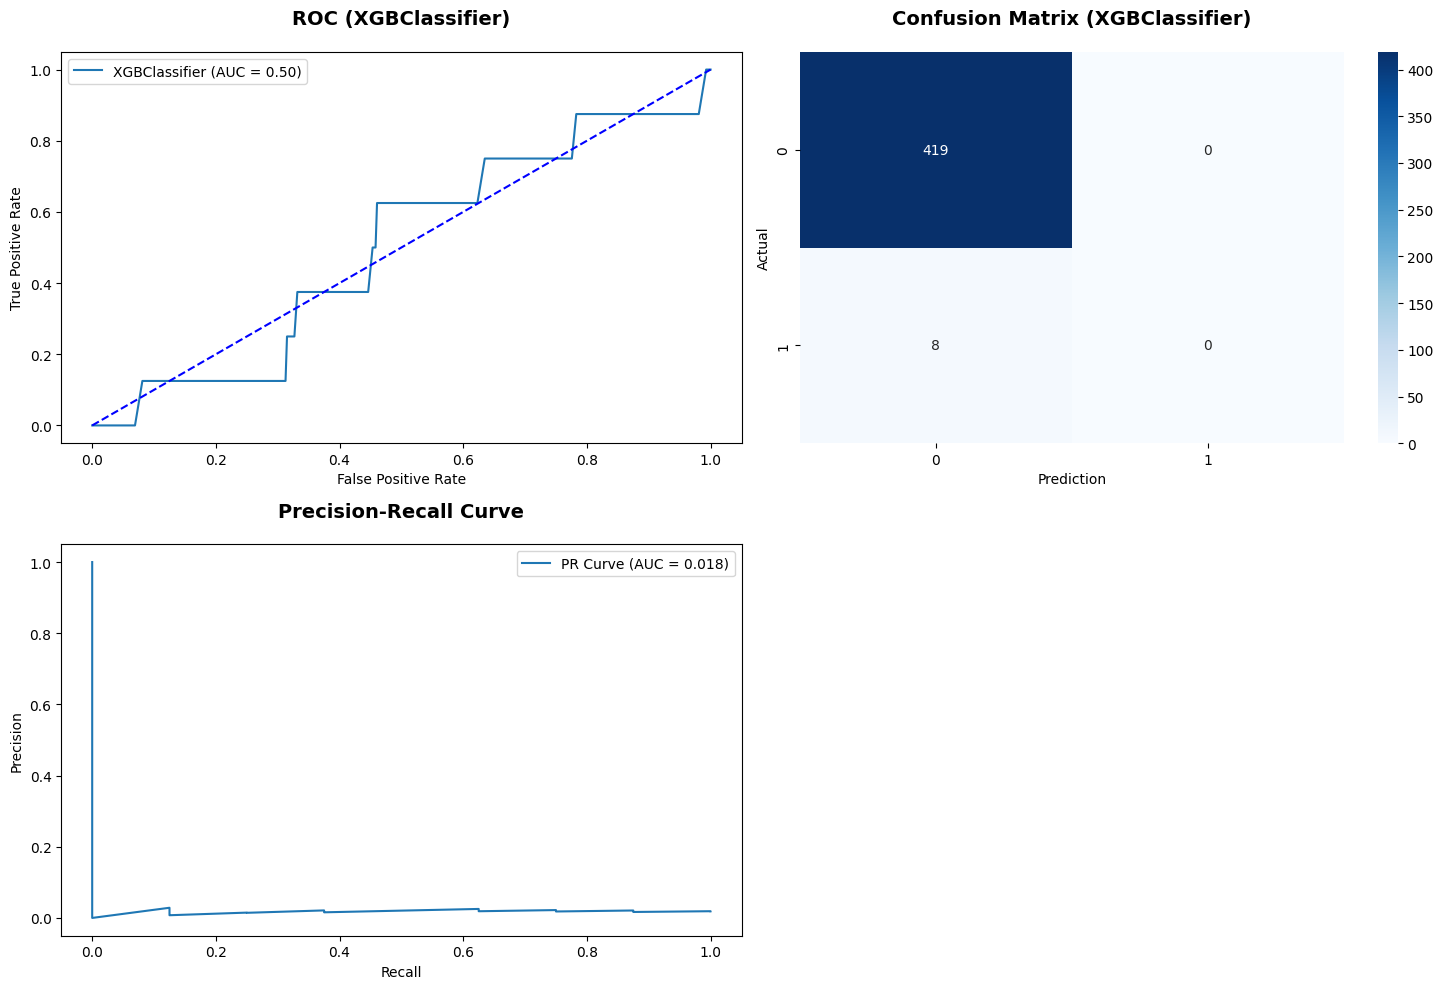

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       419
           1       0.00      0.00      0.00         8

    accuracy                           0.98       427
   macro avg       0.49      0.50      0.50       427
weighted avg       0.96      0.98      0.97       427



In [72]:
rocScore_xgb = evaluate_model(model = model_xgb, X_train=df_fraud_new_prepared, X_val=X_val_prepared,
                               y_train=df_fraud_label, y_val=y_val, figsize=(15, 10))

## VotingClassifier

Evaluating VotingClassifier...


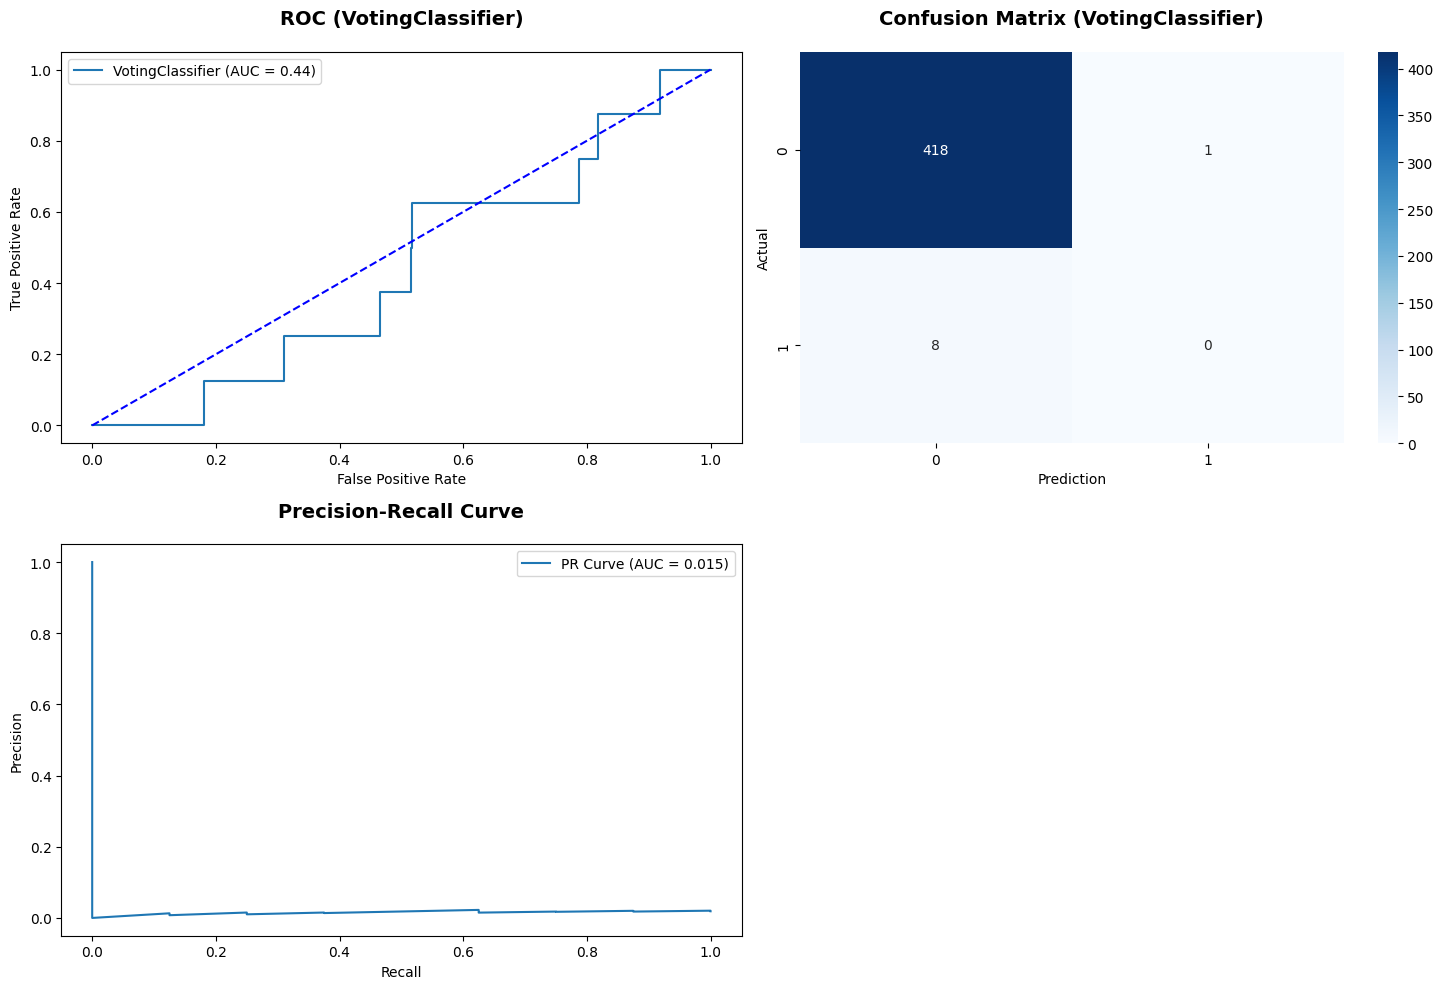

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       419
           1       0.00      0.00      0.00         8

    accuracy                           0.98       427
   macro avg       0.49      0.50      0.49       427
weighted avg       0.96      0.98      0.97       427



In [82]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("rf", model_rf),
        ("hgb", model_hgb),
        ("cb", model_cb),
        ("xgb", model_xgb)
    ],
    voting="soft",
    weights=[rocScore_rf, rocScore_hgb, rocScore_cb, rocScore_xgb],
    n_jobs=-1
)

X_cat = df_fraud_new_prepared.toarray() if hasattr(df_fraud_new_prepared, "toarray") else df_fraud_new_prepared
X_val_prepared = X_val_prepared.toarray() if hasattr(X_val_prepared, "toarray") else X_val_prepared

rocScore_vc = evaluate_model(model = voting_clf_soft, X_train=X_cat, X_val=X_val_prepared,
               y_train=df_fraud_label, y_val=y_val, figsize=(15, 10))

PermutationExplainer explainer: 428it [03:04,  2.19it/s]                         


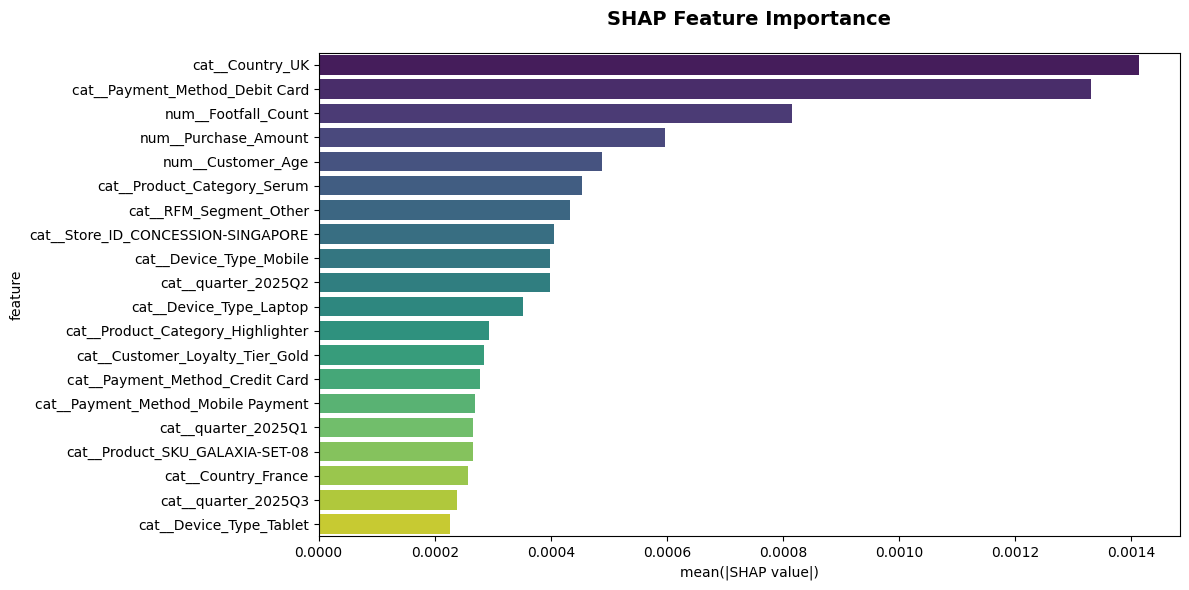

In [86]:
shap_plot(model=voting_clf_soft, X_test=X_val_prepared, list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 428it [03:02,  2.21it/s]                         


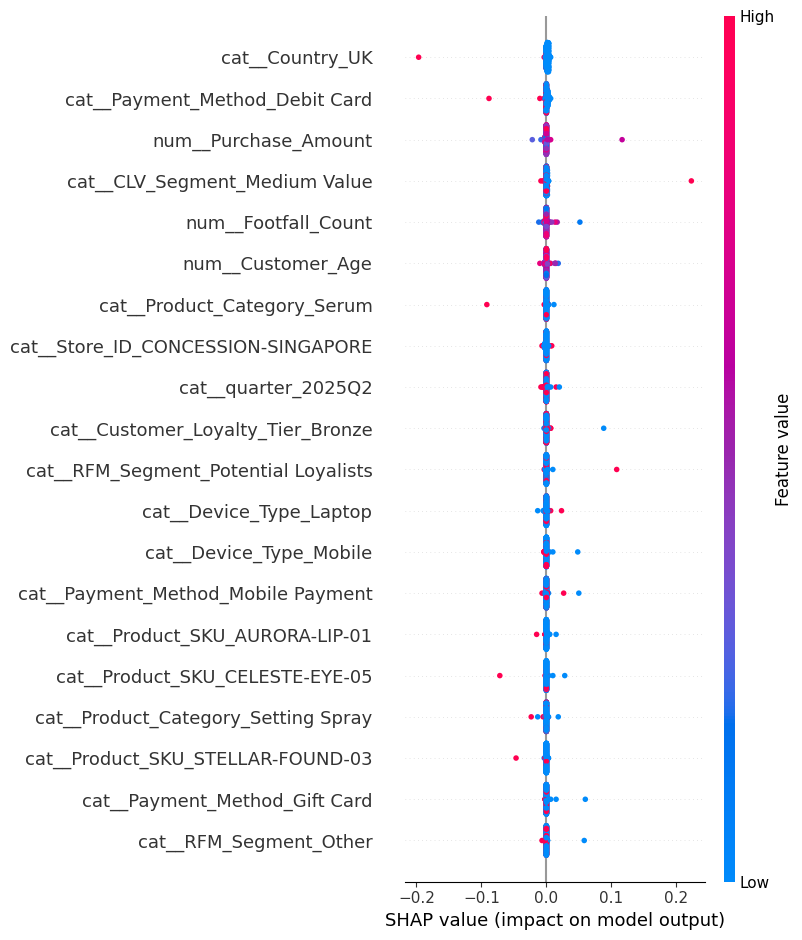

In [87]:
shap_plot(model=voting_clf_soft, X_test=X_val_prepared, list_feature=list_feature_prepared)

**SHAP Feature Importance — quick summary**

**Top drivers** (largest effects by mean |SHAP|; direction not shown):

1. **Country = UK** (strongest)
2. **Payment Method = Debit Card**
3. **Footfall\_Count** (traffic)
4. **Purchase\_Amount** (ticket size)
5. **Customer\_Age**
6. **Product Category = Serum**
7. **RFM Segment = Other**
8. **Store\_ID = CONCESSION–SINGAPORE**
9. **Device Type = Mobile / Laptop**
10. **Time: quarter\_2025Q2** (Q1/Q3 also appear)

**Implications**

* **Geography & payment method** are strong signals: transactions from **UK** and paid by **Debit Card** heavily influence fraud predictions.
* **Operational context**—higher **Footfall** and **larger purchases**—matters; add controls during busy periods and for high-value orders.
* **Mobile devices** stand out more than tablets → consider stronger checks on mobile flows.
* **Seasonality/time** (Q2) suggests campaign or period effects.
* Specific **categories** (Serum, Highlighter) and **locations** (CONCESSION–SINGAPORE) warrant closer monitoring.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
